In [3]:
import pandas as pd
import normet as nm
import matplotlib.pyplot as plt
import matplotlib

In [4]:
df=pd.read_csv('data_AQ_Weekly.csv',parse_dates=['date'])
df=df.query(f"date>='2015-05-01'").query(f"date<'2016-04-30'")
control_pool=["Dongguan", "Zhongshan" , "Foshan", "Beihai"
               , "Nanning","Nanchang" , "Xiamen", "Taizhou" 
               , "Ningbo","Guangzhou" , "Huizhou", "Hangzhou" 
               , "Liuzhou", "Shantou", "Jiangmen", "Heyuan", "Quanzhou","Haikou" , "Shenzhen", "Wenzhou", "Huzhou"
               , "Zhuhai", "Fuzhou", "Shaoxing", "Zhaoqing","Zhoushan"  
               , "Quzhou", "Jinhua", "Shaoguan" , "Sanya"
               , "Jieyang" , "Meizhou", "Shanwei" 
               , "Zhanjiang" , "Chaozhou", "Maoming" , "Yangjiang"]

df=df[df['ID'].isin(control_pool+["2+26 cities"])]

In [3]:
scm_result=nm.scm(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,cutoff_date='2015-10-23')

In [4]:
scm_result

{'synthetic':              observed  synthetic     effect
 date                                       
 2015-05-03  36.822724  36.537563   0.285161
 2015-05-10  35.284317  35.519014  -0.234697
 2015-05-17  34.742172  34.747215  -0.005043
 2015-05-24  34.482513  34.431788   0.050725
 2015-05-31  34.490734  34.585291  -0.094558
 2015-06-07  33.772677  33.695164   0.077513
 2015-06-14  33.150117  33.082645   0.067472
 2015-06-21  31.997821  32.154204  -0.156383
 2015-06-28  30.736631  30.952307  -0.215676
 2015-07-05  30.486214  30.515918  -0.029703
 2015-07-12  30.138826  29.764681   0.374145
 2015-07-19  29.264074  29.231348   0.032727
 2015-07-26  28.563726  28.749502  -0.185776
 2015-08-02  28.612871  28.699026  -0.086155
 2015-08-09  28.836226  28.537991   0.298234
 2015-08-16  28.961804  29.032769  -0.070965
 2015-08-23  29.539887  29.556016  -0.016129
 2015-08-30  29.019531  29.216834  -0.197304
 2015-09-06  29.167830  29.249974  -0.082143
 2015-09-13  29.979261  29.926675   0.0525

<Axes: xlabel='date'>

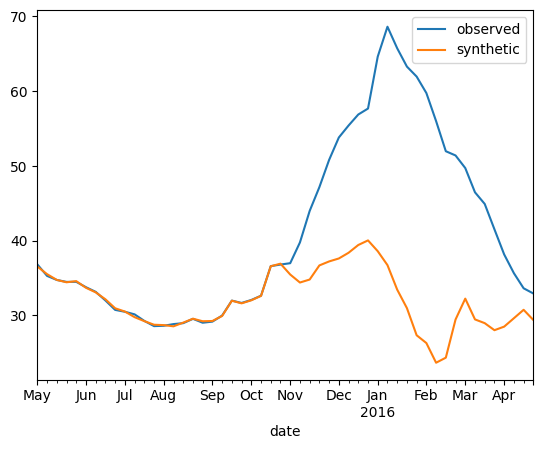

In [5]:
scm_result["synthetic"][['observed','synthetic']].plot()

<Axes: xlabel='date'>

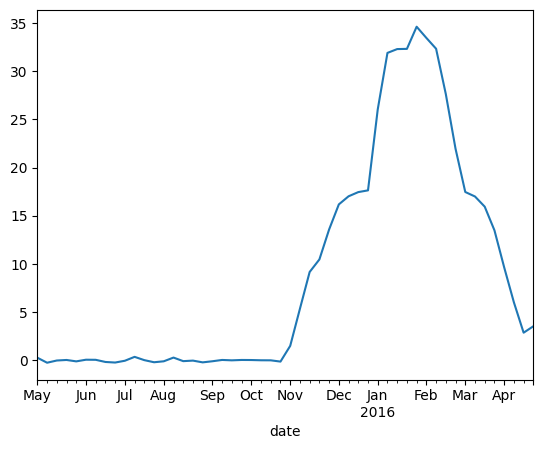

In [6]:
scm_result["synthetic"]['effect'].plot()

In [7]:
mlscm_result=nm.mlscm(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,cutoff_date='2015-10-23')


<Axes: xlabel='date'>

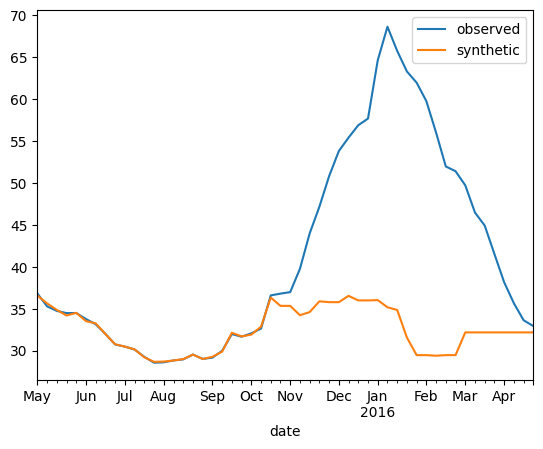

In [8]:
mlscm_result[['observed','synthetic']].plot()

<Axes: xlabel='date'>

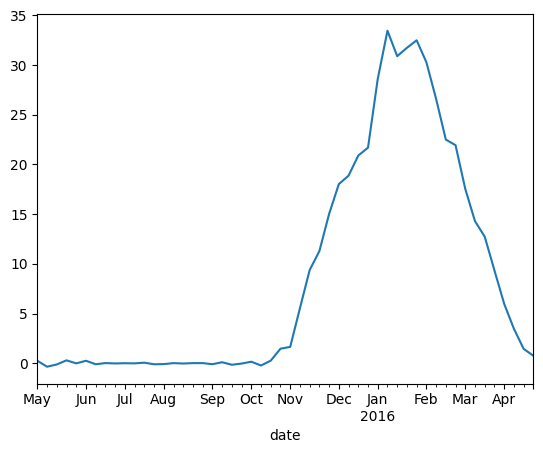

In [9]:
mlscm_result['effect'].plot()

In [10]:
mlscm_result_h2o=nm.mlscm(df,date_col="date",outcome_col='SO2wn',unit_col='ID',
                        treated_unit="2+26 cities",donors=control_pool,cutoff_date='2015-10-23',backend='h2o')


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 15 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.707 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:49:45.42: Project: AutoML_5_20250917_174945
17:49:45.43: Setting stopping tolerance adaptively based on the training frame: 0.05
17:49:45.43: Build control seed: 7654321
17:49:45.43: training frame: Frame key: AutoML_5_20250917_174945_training_py_37_sid_ab9a    cols: 38    rows: 25  chunks: 1    size: 8084  checksum: -5997765162865456816
17:49:45.43: validation frame: NULL
17:49:45.43: leaderboard frame: NULL
17:49:45.46: blending frame: NULL
17:49:45.46: response column: value
17:49:45.46: fold column: null
17:49:45.46: weights column: null
17:49:45.47: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing

<Axes: xlabel='date'>

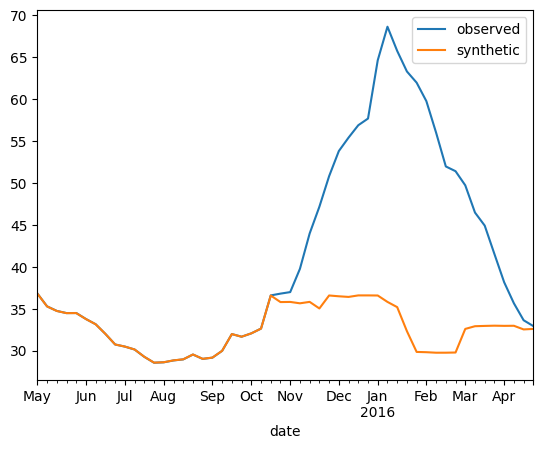

In [11]:
mlscm_result_h2o[['observed','synthetic']].plot()

<Axes: xlabel='date'>

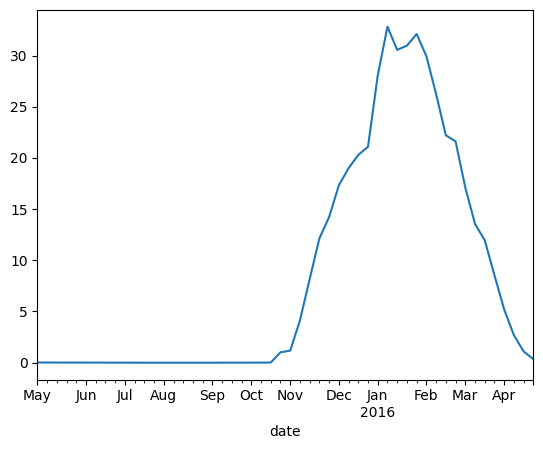

In [12]:
mlscm_result_h2o['effect'].plot()

# Placebo test

In [13]:
# 1) Run placebo-in-space (you already have this)
out = nm.placebo_in_space(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",
                          donors=control_pool,cutoff_date='2015-10-23')

# 2) Build 95% bands from the placebo distribution (quantile method)
bands = nm.effect_bands_space(out, level=0.95, method="quantile")



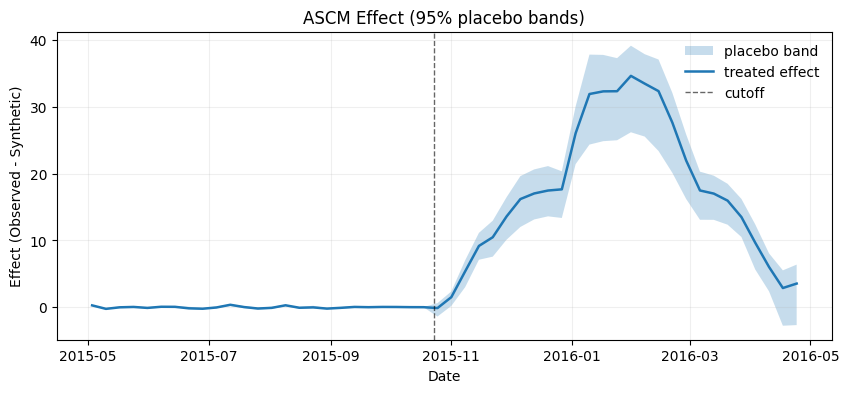

In [14]:
# 3) Plot
nm.plot_effect_with_bands(bands, cutoff_date="2015-10-23", title="scm Effect (95% placebo bands)")
plt.show()

# Uncertainty

In [15]:
out1 = nm.uncertainty_bands(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,
                            cutoff_date='2015-10-23', method = "jackknife")

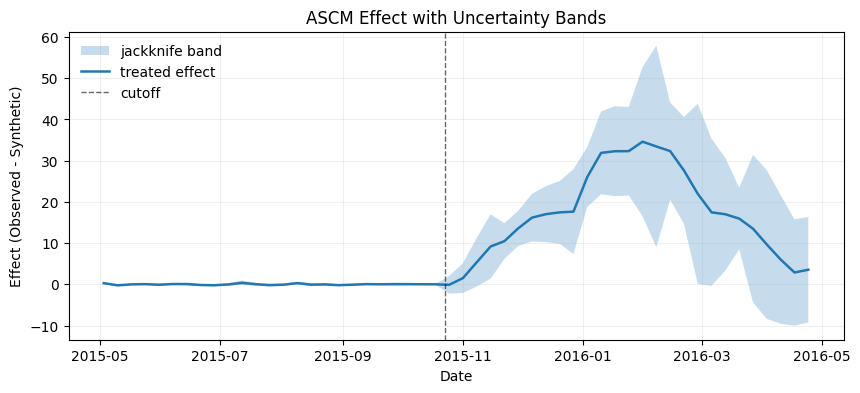

In [16]:
nm.plot_uncertainty_bands(out1, cutoff_date="2015-10-23")
plt.show()

In [17]:
out2 = nm.uncertainty_bands(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,
                            cutoff_date='2015-10-23', method = "bootstrap")

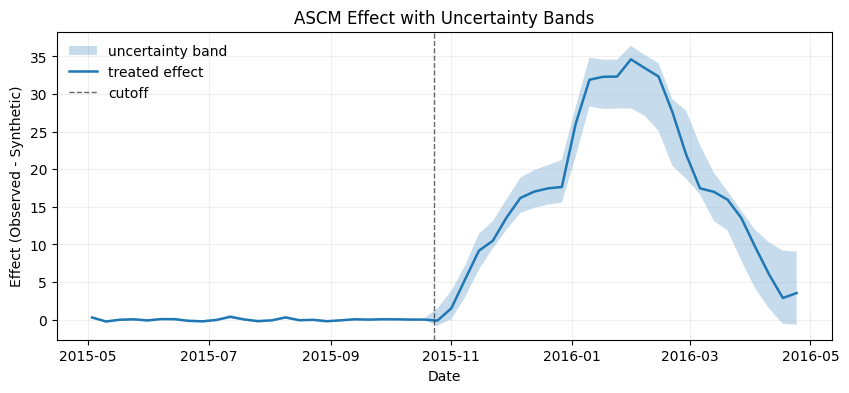

In [18]:
nm.plot_uncertainty_bands(out2, cutoff_date="2015-10-23")
plt.show()

# Placebo test_AutoML based scm

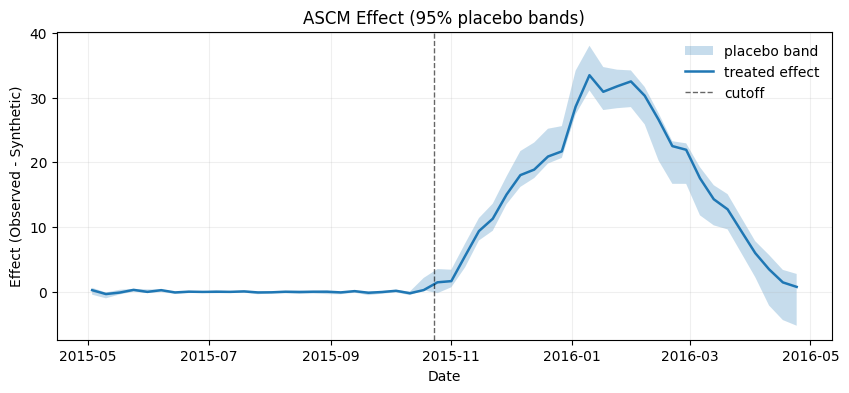

In [19]:
# 1) Run placebo-in-space (you already have this)
out = nm.placebo_in_space(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",
                          donors=control_pool,cutoff_date='2015-10-23',scm_backend='mlscm')

# 2) Build 95% bands from the placebo distribution (quantile method)
bands = nm.effect_bands_space(out, level=0.95, method="quantile")

# 3) Plot
nm.plot_effect_with_bands(bands, cutoff_date="2015-10-23", title="scm Effect (95% placebo bands)")
plt.show()

In [5]:
out = nm.placebo_in_space(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",
                          donors=control_pool,cutoff_date='2015-10-23',scm_backend='mlscm',backend='h2o',
                          verbose=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.801 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.799 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.796 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.796 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.796 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.793 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.793 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.791 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.789 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.786 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.783 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.783 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.782 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.780 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 50 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.777 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.775 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.775 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.773 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.771 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.771 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.769 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.765 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.765 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.764 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.761 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.759 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.759 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.757 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.753 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.991 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 51 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.991 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.989 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.986 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.983 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.981 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.978 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.977 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,19 hours 52 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.977 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


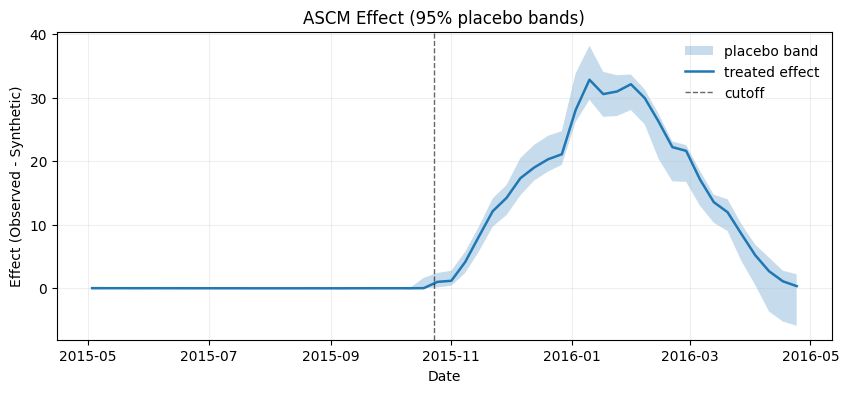

In [21]:
# 2) Build 95% bands from the placebo distribution (quantile method)
bands = nm.effect_bands_space(out, level=0.95, method="quantile")

# 3) Plot
nm.plot_effect_with_bands(bands, cutoff_date="2015-10-23", title="scm Effect (95% placebo bands)")
plt.show()

# Uncertainty_AutoML based scm

In [23]:
out1 = nm.uncertainty_bands(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,
                            cutoff_date='2015-10-23', scm_backend='mlscm',method = "jackknife")

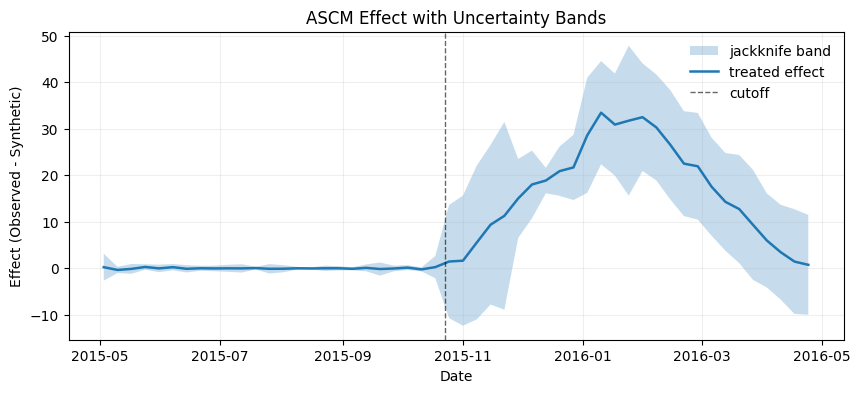

In [24]:
nm.plot_uncertainty_bands(out1, cutoff_date="2015-10-23")
plt.show()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.689 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:27.918: Project: AutoML_44_20250917_195427
19:54:27.920: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:27.920: Build control seed: 7654321
19:54:27.920: training frame: Frame key: AutoML_44_20250917_195427_training_py_1636_sid_853c    cols: 38    rows: 25  chunks: 1    size: 8084  checksum: -5997765162865456816
19:54:27.920: validation frame: NULL
19:54:27.920: leaderboard frame: NULL
19:54:27.920: blending frame: NULL
19:54:27.920: response column: value
19:54:27.920: fold column: null
19:54:27.920: weights column: null
19:54:27.920: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.688 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:33.190: Project: AutoML_45_20250917_195433
19:54:33.191: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:33.191: Build control seed: 7654321
19:54:33.191: training frame: Frame key: AutoML_45_20250917_195433_training_py_1670_sid_a86a    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 315704992255864226
19:54:33.191: validation frame: NULL
19:54:33.191: leaderboard frame: NULL
19:54:33.191: blending frame: NULL
19:54:33.191: response column: value
19:54:33.191: fold column: null
19:54:33.191: weights column: null
19:54:33.191: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w),

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.685 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:37.32: Project: AutoML_46_20250917_195437
19:54:37.33: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:37.33: Build control seed: 7654321
19:54:37.33: training frame: Frame key: AutoML_46_20250917_195437_training_py_1704_sid_9977    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -5785419566557554250
19:54:37.33: validation frame: NULL
19:54:37.33: leaderboard frame: NULL
19:54:37.33: blending frame: NULL
19:54:37.34: response column: value
19:54:37.34: fold column: null
19:54:37.34: weights column: null
19:54:37.34: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annea

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.685 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:40.812: Project: AutoML_47_20250917_195440
19:54:40.814: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:40.814: Build control seed: 7654321
19:54:40.814: training frame: Frame key: AutoML_47_20250917_195440_training_py_1738_sid_af72    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -2264107048337343780
19:54:40.814: validation frame: NULL
19:54:40.814: leaderboard frame: NULL
19:54:40.814: blending frame: NULL
19:54:40.814: response column: value
19:54:40.814: fold column: null
19:54:40.814: weights column: null
19:54:40.814: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.683 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:45.35: Project: AutoML_48_20250917_195445
19:54:45.36: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:45.36: Build control seed: 7654321
19:54:45.36: training frame: Frame key: AutoML_48_20250917_195445_training_py_1772_sid_bea5    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -810319012154473856
19:54:45.36: validation frame: NULL
19:54:45.36: leaderboard frame: NULL
19:54:45.36: blending frame: NULL
19:54:45.36: response column: value
19:54:45.36: fold column: null
19:54:45.36: weights column: null
19:54:45.36: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anneal

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.681 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:48.774: Project: AutoML_49_20250917_195448
19:54:48.776: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:48.776: Build control seed: 7654321
19:54:48.776: training frame: Frame key: AutoML_49_20250917_195448_training_py_1806_sid_8f24    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 6948917076662562573
19:54:48.776: validation frame: NULL
19:54:48.776: leaderboard frame: NULL
19:54:48.776: blending frame: NULL
19:54:48.776: response column: value
19:54:48.776: fold column: null
19:54:48.776: weights column: null
19:54:48.776: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.678 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:52.734: Project: AutoML_50_20250917_195452
19:54:52.735: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:52.735: Build control seed: 7654321
19:54:52.735: training frame: Frame key: AutoML_50_20250917_195452_training_py_1840_sid_a854    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 1928620762820049113
19:54:52.735: validation frame: NULL
19:54:52.735: leaderboard frame: NULL
19:54:52.735: blending frame: NULL
19:54:52.735: response column: value
19:54:52.735: fold column: null
19:54:52.735: weights column: null
19:54:52.735: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.675 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:54:56.518: Project: AutoML_51_20250917_195456
19:54:56.518: Setting stopping tolerance adaptively based on the training frame: 0.05
19:54:56.518: Build control seed: 7654321
19:54:56.518: training frame: Frame key: AutoML_51_20250917_195456_training_py_1874_sid_86e4    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -4981552600033228073
19:54:56.518: validation frame: NULL
19:54:56.518: leaderboard frame: NULL
19:54:56.518: blending frame: NULL
19:54:56.518: response column: value
19:54:56.518: fold column: null
19:54:56.518: weights column: null
19:54:56.518: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.675 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:00.98: Project: AutoML_52_20250917_195500
19:55:00.98: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:00.98: Build control seed: 7654321
19:55:00.98: training frame: Frame key: AutoML_52_20250917_195500_training_py_1908_sid_b4e2    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2626146431387731968
19:55:00.98: validation frame: NULL
19:55:00.98: leaderboard frame: NULL
19:55:00.98: blending frame: NULL
19:55:00.98: response column: value
19:55:00.98: fold column: null
19:55:00.98: weights column: null
19:55:00.99: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anneal

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.673 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:04.748: Project: AutoML_53_20250917_195504
19:55:04.750: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:04.750: Build control seed: 7654321
19:55:04.750: training frame: Frame key: AutoML_53_20250917_195504_training_py_1942_sid_b423    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2872766031130599104
19:55:04.750: validation frame: NULL
19:55:04.750: leaderboard frame: NULL
19:55:04.750: blending frame: NULL
19:55:04.750: response column: value
19:55:04.750: fold column: null
19:55:04.750: weights column: null
19:55:04.750: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.671 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:08.636: Project: AutoML_54_20250917_195508
19:55:08.637: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:08.637: Build control seed: 7654321
19:55:08.637: training frame: Frame key: AutoML_54_20250917_195508_training_py_1976_sid_95a8    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -6396578186925536634
19:55:08.637: validation frame: NULL
19:55:08.637: leaderboard frame: NULL
19:55:08.637: blending frame: NULL
19:55:08.637: response column: value
19:55:08.637: fold column: null
19:55:08.637: weights column: null
19:55:08.637: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.668 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:12.735: Project: AutoML_55_20250917_195512
19:55:12.735: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:12.735: Build control seed: 7654321
19:55:12.735: training frame: Frame key: AutoML_55_20250917_195512_training_py_2010_sid_8ef1    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2606801728810573436
19:55:12.735: validation frame: NULL
19:55:12.735: leaderboard frame: NULL
19:55:12.735: blending frame: NULL
19:55:12.736: response column: value
19:55:12.736: fold column: null
19:55:12.736: weights column: null
19:55:12.736: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.666 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:17.422: Project: AutoML_56_20250917_195517
19:55:17.424: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:17.424: Build control seed: 7654321
19:55:17.424: training frame: Frame key: AutoML_56_20250917_195517_training_py_2044_sid_9995    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 8199700198316381218
19:55:17.424: validation frame: NULL
19:55:17.424: leaderboard frame: NULL
19:55:17.424: blending frame: NULL
19:55:17.424: response column: value
19:55:17.424: fold column: null
19:55:17.424: weights column: null
19:55:17.424: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.666 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:21.14: Project: AutoML_57_20250917_195521
19:55:21.15: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:21.15: Build control seed: 7654321
19:55:21.15: training frame: Frame key: AutoML_57_20250917_195521_training_py_2078_sid_be69    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -4458298902809842924
19:55:21.15: validation frame: NULL
19:55:21.15: leaderboard frame: NULL
19:55:21.15: blending frame: NULL
19:55:21.15: response column: value
19:55:21.15: fold column: null
19:55:21.15: weights column: null
19:55:21.15: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annea

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.664 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:24.825: Project: AutoML_58_20250917_195524
19:55:24.826: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:24.826: Build control seed: 7654321
19:55:24.826: training frame: Frame key: AutoML_58_20250917_195524_training_py_2112_sid_8e97    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -8586777226829640320
19:55:24.826: validation frame: NULL
19:55:24.826: leaderboard frame: NULL
19:55:24.826: blending frame: NULL
19:55:24.826: response column: value
19:55:24.826: fold column: null
19:55:24.826: weights column: null
19:55:24.826: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.662 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:28.744: Project: AutoML_59_20250917_195528
19:55:28.745: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:28.745: Build control seed: 7654321
19:55:28.745: training frame: Frame key: AutoML_59_20250917_195528_training_py_2146_sid_9bd3    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 4624880443465200662
19:55:28.745: validation frame: NULL
19:55:28.745: leaderboard frame: NULL
19:55:28.745: blending frame: NULL
19:55:28.745: response column: value
19:55:28.745: fold column: null
19:55:28.745: weights column: null
19:55:28.745: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.658 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:32.248: Project: AutoML_60_20250917_195532
19:55:32.249: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:32.249: Build control seed: 7654321
19:55:32.249: training frame: Frame key: AutoML_60_20250917_195532_training_py_2180_sid_b1b8    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 6696505114523242336
19:55:32.249: validation frame: NULL
19:55:32.249: leaderboard frame: NULL
19:55:32.249: blending frame: NULL
19:55:32.249: response column: value
19:55:32.249: fold column: null
19:55:32.249: weights column: null
19:55:32.249: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.658 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:35.777: Project: AutoML_61_20250917_195535
19:55:35.778: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:35.778: Build control seed: 7654321
19:55:35.778: training frame: Frame key: AutoML_61_20250917_195535_training_py_2214_sid_b4e9    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -3403099417149679084
19:55:35.778: validation frame: NULL
19:55:35.778: leaderboard frame: NULL
19:55:35.778: blending frame: NULL
19:55:35.778: response column: value
19:55:35.778: fold column: null
19:55:35.778: weights column: null
19:55:35.778: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.657 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:39.533: Project: AutoML_62_20250917_195539
19:55:39.534: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:39.534: Build control seed: 7654321
19:55:39.534: training frame: Frame key: AutoML_62_20250917_195539_training_py_2248_sid_9696    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -2229595128576955112
19:55:39.534: validation frame: NULL
19:55:39.534: leaderboard frame: NULL
19:55:39.534: blending frame: NULL
19:55:39.534: response column: value
19:55:39.534: fold column: null
19:55:39.534: weights column: null
19:55:39.534: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.654 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:43.652: Project: AutoML_63_20250917_195543
19:55:43.653: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:43.653: Build control seed: 7654321
19:55:43.653: training frame: Frame key: AutoML_63_20250917_195543_training_py_2282_sid_b222    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -4017625848724250590
19:55:43.653: validation frame: NULL
19:55:43.653: leaderboard frame: NULL
19:55:43.653: blending frame: NULL
19:55:43.653: response column: value
19:55:43.653: fold column: null
19:55:43.653: weights column: null
19:55:43.653: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.651 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:47.446: Project: AutoML_64_20250917_195547
19:55:47.447: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:47.447: Build control seed: 7654321
19:55:47.447: training frame: Frame key: AutoML_64_20250917_195547_training_py_2316_sid_be8e    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2186455917549287884
19:55:47.447: validation frame: NULL
19:55:47.447: leaderboard frame: NULL
19:55:47.447: blending frame: NULL
19:55:47.447: response column: value
19:55:47.447: fold column: null
19:55:47.447: weights column: null
19:55:47.447: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.651 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:51.242: Project: AutoML_65_20250917_195551
19:55:51.243: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:51.243: Build control seed: 7654321
19:55:51.243: training frame: Frame key: AutoML_65_20250917_195551_training_py_2350_sid_8a61    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 3136418547855897563
19:55:51.243: validation frame: NULL
19:55:51.243: leaderboard frame: NULL
19:55:51.243: blending frame: NULL
19:55:51.243: response column: value
19:55:51.243: fold column: null
19:55:51.243: weights column: null
19:55:51.243: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.650 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:54.691: Project: AutoML_66_20250917_195554
19:55:54.693: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:54.693: Build control seed: 7654321
19:55:54.693: training frame: Frame key: AutoML_66_20250917_195554_training_py_2384_sid_b4d2    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -5375360354682903988
19:55:54.693: validation frame: NULL
19:55:54.693: leaderboard frame: NULL
19:55:54.693: blending frame: NULL
19:55:54.693: response column: value
19:55:54.693: fold column: null
19:55:54.693: weights column: null
19:55:54.693: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.647 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:55:59.448: Project: AutoML_67_20250917_195559
19:55:59.448: Setting stopping tolerance adaptively based on the training frame: 0.05
19:55:59.448: Build control seed: 7654321
19:55:59.448: training frame: Frame key: AutoML_67_20250917_195559_training_py_2418_sid_a50a    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -4920620776385254660
19:55:59.449: validation frame: NULL
19:55:59.449: leaderboard frame: NULL
19:55:59.449: blending frame: NULL
19:55:59.449: response column: value
19:55:59.449: fold column: null
19:55:59.449: weights column: null
19:55:59.449: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.645 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:02.911: Project: AutoML_68_20250917_195602
19:56:02.911: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:02.911: Build control seed: 7654321
19:56:02.912: training frame: Frame key: AutoML_68_20250917_195602_training_py_2452_sid_9f61    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 3057265682562866437
19:56:02.912: validation frame: NULL
19:56:02.912: leaderboard frame: NULL
19:56:02.912: blending frame: NULL
19:56:02.912: response column: value
19:56:02.912: fold column: null
19:56:02.912: weights column: null
19:56:02.912: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.642 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:06.699: Project: AutoML_69_20250917_195606
19:56:06.700: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:06.700: Build control seed: 7654321
19:56:06.700: training frame: Frame key: AutoML_69_20250917_195606_training_py_2486_sid_bddf    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -7744369354694736246
19:56:06.700: validation frame: NULL
19:56:06.700: leaderboard frame: NULL
19:56:06.700: blending frame: NULL
19:56:06.700: response column: value
19:56:06.700: fold column: null
19:56:06.700: weights column: null
19:56:06.700: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.642 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:10.444: Project: AutoML_70_20250917_195610
19:56:10.445: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:10.445: Build control seed: 7654321
19:56:10.445: training frame: Frame key: AutoML_70_20250917_195610_training_py_2520_sid_95fa    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 2110080085474457713
19:56:10.445: validation frame: NULL
19:56:10.445: leaderboard frame: NULL
19:56:10.445: blending frame: NULL
19:56:10.445: response column: value
19:56:10.445: fold column: null
19:56:10.445: weights column: null
19:56:10.445: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.640 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:14.332: Project: AutoML_71_20250917_195614
19:56:14.333: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:14.333: Build control seed: 7654321
19:56:14.333: training frame: Frame key: AutoML_71_20250917_195614_training_py_2554_sid_88b4    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 5616896861888207050
19:56:14.333: validation frame: NULL
19:56:14.333: leaderboard frame: NULL
19:56:14.333: blending frame: NULL
19:56:14.333: response column: value
19:56:14.333: fold column: null
19:56:14.333: weights column: null
19:56:14.333: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.636 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:18.496: Project: AutoML_72_20250917_195618
19:56:18.497: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:18.497: Build control seed: 7654321
19:56:18.497: training frame: Frame key: AutoML_72_20250917_195618_training_py_2588_sid_9417    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1697190800102104786
19:56:18.497: validation frame: NULL
19:56:18.497: leaderboard frame: NULL
19:56:18.497: blending frame: NULL
19:56:18.497: response column: value
19:56:18.497: fold column: null
19:56:18.497: weights column: null
19:56:18.497: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.558 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:22.467: Project: AutoML_73_20250917_195622
19:56:22.468: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:22.468: Build control seed: 7654321
19:56:22.468: training frame: Frame key: AutoML_73_20250917_195622_training_py_2622_sid_8a5e    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 3733916435159952340
19:56:22.468: validation frame: NULL
19:56:22.468: leaderboard frame: NULL
19:56:22.468: blending frame: NULL
19:56:22.468: response column: value
19:56:22.468: fold column: null
19:56:22.468: weights column: null
19:56:22.469: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.558 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:26.208: Project: AutoML_74_20250917_195626
19:56:26.209: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:26.209: Build control seed: 7654321
19:56:26.209: training frame: Frame key: AutoML_74_20250917_195626_training_py_2656_sid_b85a    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -4383767554242046335
19:56:26.209: validation frame: NULL
19:56:26.209: leaderboard frame: NULL
19:56:26.209: blending frame: NULL
19:56:26.209: response column: value
19:56:26.209: fold column: null
19:56:26.209: weights column: null
19:56:26.209: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.556 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:29.855: Project: AutoML_75_20250917_195629
19:56:29.856: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:29.856: Build control seed: 7654321
19:56:29.857: training frame: Frame key: AutoML_75_20250917_195629_training_py_2690_sid_a779    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 5371229270696726695
19:56:29.857: validation frame: NULL
19:56:29.857: leaderboard frame: NULL
19:56:29.857: blending frame: NULL
19:56:29.857: response column: value
19:56:29.857: fold column: null
19:56:29.857: weights column: null
19:56:29.857: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.554 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:33.939: Project: AutoML_76_20250917_195633
19:56:33.940: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:33.940: Build control seed: 7654321
19:56:33.940: training frame: Frame key: AutoML_76_20250917_195633_training_py_2724_sid_8691    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -4482294107676649804
19:56:33.940: validation frame: NULL
19:56:33.940: leaderboard frame: NULL
19:56:33.940: blending frame: NULL
19:56:33.940: response column: value
19:56:33.940: fold column: null
19:56:33.940: weights column: null
19:56:33.940: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.551 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:37.781: Project: AutoML_77_20250917_195637
19:56:37.782: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:37.782: Build control seed: 7654321
19:56:37.782: training frame: Frame key: AutoML_77_20250917_195637_training_py_2758_sid_bd49    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -4341211785238752009
19:56:37.782: validation frame: NULL
19:56:37.782: leaderboard frame: NULL
19:56:37.782: blending frame: NULL
19:56:37.782: response column: value
19:56:37.782: fold column: null
19:56:37.782: weights column: null
19:56:37.782: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.551 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:41.597: Project: AutoML_78_20250917_195641
19:56:41.598: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:41.598: Build control seed: 7654321
19:56:41.598: training frame: Frame key: AutoML_78_20250917_195641_training_py_2792_sid_b410    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -2208995081454954948
19:56:41.598: validation frame: NULL
19:56:41.598: leaderboard frame: NULL
19:56:41.598: blending frame: NULL
19:56:41.598: response column: value
19:56:41.598: fold column: null
19:56:41.598: weights column: null
19:56:41.598: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.549 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:45.795: Project: AutoML_79_20250917_195645
19:56:45.796: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:45.796: Build control seed: 7654321
19:56:45.797: training frame: Frame key: AutoML_79_20250917_195645_training_py_2826_sid_8b5c    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 1994816849632402422
19:56:45.797: validation frame: NULL
19:56:45.797: leaderboard frame: NULL
19:56:45.797: blending frame: NULL
19:56:45.797: response column: value
19:56:45.797: fold column: null
19:56:45.797: weights column: null
19:56:45.797: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.547 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:50.136: Project: AutoML_80_20250917_195650
19:56:50.138: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:50.138: Build control seed: 7654321
19:56:50.138: training frame: Frame key: AutoML_80_20250917_195650_training_py_2860_sid_ad7d    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -7946991139965769868
19:56:50.138: validation frame: NULL
19:56:50.138: leaderboard frame: NULL
19:56:50.138: blending frame: NULL
19:56:50.138: response column: value
19:56:50.138: fold column: null
19:56:50.138: weights column: null
19:56:50.138: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.544 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:54.754: Project: AutoML_81_20250917_195654
19:56:54.755: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:54.755: Build control seed: 7654321
19:56:54.755: training frame: Frame key: AutoML_81_20250917_195654_training_py_2894_sid_9097    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -5361872045173876190
19:56:54.755: validation frame: NULL
19:56:54.755: leaderboard frame: NULL
19:56:54.755: blending frame: NULL
19:56:54.755: response column: value
19:56:54.755: fold column: null
19:56:54.755: weights column: null
19:56:54.755: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:56:58.215: Project: AutoML_82_20250917_195658
19:56:58.216: Setting stopping tolerance adaptively based on the training frame: 0.05
19:56:58.216: Build control seed: 7654321
19:56:58.216: training frame: Frame key: AutoML_82_20250917_195658_training_py_2928_sid_b797    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 1291494571797484192
19:56:58.216: validation frame: NULL
19:56:58.216: leaderboard frame: NULL
19:56:58.216: blending frame: NULL
19:56:58.216: response column: value
19:56:58.216: fold column: null
19:56:58.216: weights column: null
19:56:58.217: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:01.799: Project: AutoML_83_20250917_195701
19:57:01.800: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:01.800: Build control seed: 7654321
19:57:01.800: training frame: Frame key: AutoML_83_20250917_195701_training_py_2962_sid_a119    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2338684903325650976
19:57:01.800: validation frame: NULL
19:57:01.800: leaderboard frame: NULL
19:57:01.800: blending frame: NULL
19:57:01.800: response column: value
19:57:01.800: fold column: null
19:57:01.800: weights column: null
19:57:01.800: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.539 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:05.321: Project: AutoML_84_20250917_195705
19:57:05.322: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:05.322: Build control seed: 7654321
19:57:05.322: training frame: Frame key: AutoML_84_20250917_195705_training_py_2996_sid_995f    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2936787249750668624
19:57:05.322: validation frame: NULL
19:57:05.322: leaderboard frame: NULL
19:57:05.322: blending frame: NULL
19:57:05.322: response column: value
19:57:05.322: fold column: null
19:57:05.322: weights column: null
19:57:05.323: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.537 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:09.120: Project: AutoML_85_20250917_195709
19:57:09.121: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:09.121: Build control seed: 7654321
19:57:09.121: training frame: Frame key: AutoML_85_20250917_195709_training_py_3030_sid_9cf7    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -9125160046871186460
19:57:09.121: validation frame: NULL
19:57:09.121: leaderboard frame: NULL
19:57:09.121: blending frame: NULL
19:57:09.121: response column: value
19:57:09.121: fold column: null
19:57:09.121: weights column: null
19:57:09.121: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.537 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:12.652: Project: AutoML_86_20250917_195712
19:57:12.654: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:12.654: Build control seed: 7654321
19:57:12.654: training frame: Frame key: AutoML_86_20250917_195712_training_py_3064_sid_ba28    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -4366437082076737900
19:57:12.654: validation frame: NULL
19:57:12.654: leaderboard frame: NULL
19:57:12.654: blending frame: NULL
19:57:12.654: response column: value
19:57:12.654: fold column: null
19:57:12.654: weights column: null
19:57:12.654: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.533 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:16.146: Project: AutoML_87_20250917_195716
19:57:16.148: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:16.148: Build control seed: 7654321
19:57:16.148: training frame: Frame key: AutoML_87_20250917_195716_training_py_3098_sid_b348    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -3699129803252527744
19:57:16.148: validation frame: NULL
19:57:16.148: leaderboard frame: NULL
19:57:16.148: blending frame: NULL
19:57:16.148: response column: value
19:57:16.148: fold column: null
19:57:16.148: weights column: null
19:57:16.148: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.532 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:20.266: Project: AutoML_88_20250917_195720
19:57:20.266: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:20.266: Build control seed: 7654321
19:57:20.267: training frame: Frame key: AutoML_88_20250917_195720_training_py_3132_sid_9074    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -3818282444118139144
19:57:20.267: validation frame: NULL
19:57:20.267: leaderboard frame: NULL
19:57:20.267: blending frame: NULL
19:57:20.267: response column: value
19:57:20.267: fold column: null
19:57:20.267: weights column: null
19:57:20.267: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.529 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:24.196: Project: AutoML_89_20250917_195724
19:57:24.197: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:24.197: Build control seed: 7654321
19:57:24.197: training frame: Frame key: AutoML_89_20250917_195724_training_py_3166_sid_85d5    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 4517176551645562728
19:57:24.197: validation frame: NULL
19:57:24.197: leaderboard frame: NULL
19:57:24.197: blending frame: NULL
19:57:24.197: response column: value
19:57:24.197: fold column: null
19:57:24.197: weights column: null
19:57:24.197: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.526 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:28.304: Project: AutoML_90_20250917_195728
19:57:28.305: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:28.305: Build control seed: 7654321
19:57:28.305: training frame: Frame key: AutoML_90_20250917_195728_training_py_3200_sid_a21c    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 6399777567300342465
19:57:28.305: validation frame: NULL
19:57:28.305: leaderboard frame: NULL
19:57:28.305: blending frame: NULL
19:57:28.305: response column: value
19:57:28.305: fold column: null
19:57:28.305: weights column: null
19:57:28.305: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.526 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:31.803: Project: AutoML_91_20250917_195731
19:57:31.803: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:31.803: Build control seed: 7654321
19:57:31.803: training frame: Frame key: AutoML_91_20250917_195731_training_py_3234_sid_b876    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 8167722361256046659
19:57:31.803: validation frame: NULL
19:57:31.803: leaderboard frame: NULL
19:57:31.803: blending frame: NULL
19:57:31.803: response column: value
19:57:31.803: fold column: null
19:57:31.803: weights column: null
19:57:31.803: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.524 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:36.182: Project: AutoML_92_20250917_195736
19:57:36.182: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:36.183: Build control seed: 7654321
19:57:36.183: training frame: Frame key: AutoML_92_20250917_195736_training_py_3268_sid_8216    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 8052464585317463008
19:57:36.183: validation frame: NULL
19:57:36.183: leaderboard frame: NULL
19:57:36.183: blending frame: NULL
19:57:36.183: response column: value
19:57:36.183: fold column: null
19:57:36.183: weights column: null
19:57:36.183: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.522 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:40.73: Project: AutoML_93_20250917_195740
19:57:40.74: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:40.74: Build control seed: 7654321
19:57:40.74: training frame: Frame key: AutoML_93_20250917_195740_training_py_3302_sid_b5f6    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -7313993116168686328
19:57:40.74: validation frame: NULL
19:57:40.74: leaderboard frame: NULL
19:57:40.74: blending frame: NULL
19:57:40.74: response column: value
19:57:40.74: fold column: null
19:57:40.74: weights column: null
19:57:40.74: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annea

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.519 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:43.999: Project: AutoML_94_20250917_195743
19:57:44.0: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:44.0: Build control seed: 7654321
19:57:44.0: training frame: Frame key: AutoML_94_20250917_195743_training_py_3336_sid_a5cc    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 4511263294238713700
19:57:44.0: validation frame: NULL
19:57:44.0: leaderboard frame: NULL
19:57:44.0: blending frame: NULL
19:57:44.0: response column: value
19:57:44.0: fold column: null
19:57:44.0: weights column: null
19:57:44.0: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.519 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:47.531: Project: AutoML_95_20250917_195747
19:57:47.531: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:47.531: Build control seed: 7654321
19:57:47.531: training frame: Frame key: AutoML_95_20250917_195747_training_py_3370_sid_b3d0    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 7792248971078177364
19:57:47.531: validation frame: NULL
19:57:47.531: leaderboard frame: NULL
19:57:47.531: blending frame: NULL
19:57:47.531: response column: value
19:57:47.531: fold column: null
19:57:47.531: weights column: null
19:57:47.532: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.517 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:51.464: Project: AutoML_96_20250917_195751
19:57:51.465: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:51.465: Build control seed: 7654321
19:57:51.465: training frame: Frame key: AutoML_96_20250917_195751_training_py_3404_sid_a011    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -8358067665797235409
19:57:51.465: validation frame: NULL
19:57:51.465: leaderboard frame: NULL
19:57:51.465: blending frame: NULL
19:57:51.465: response column: value
19:57:51.465: fold column: null
19:57:51.466: weights column: null
19:57:51.466: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.515 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:55.381: Project: AutoML_97_20250917_195755
19:57:55.382: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:55.382: Build control seed: 7654321
19:57:55.382: training frame: Frame key: AutoML_97_20250917_195755_training_py_3438_sid_9995    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 3092564927119228355
19:57:55.382: validation frame: NULL
19:57:55.382: leaderboard frame: NULL
19:57:55.382: blending frame: NULL
19:57:55.382: response column: value
19:57:55.382: fold column: null
19:57:55.382: weights column: null
19:57:55.382: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.512 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:57:59.103: Project: AutoML_98_20250917_195759
19:57:59.104: Setting stopping tolerance adaptively based on the training frame: 0.05
19:57:59.104: Build control seed: 7654321
19:57:59.104: training frame: Frame key: AutoML_98_20250917_195759_training_py_3472_sid_8aac    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1163530327049180424
19:57:59.104: validation frame: NULL
19:57:59.104: leaderboard frame: NULL
19:57:59.104: blending frame: NULL
19:57:59.104: response column: value
19:57:59.104: fold column: null
19:57:59.104: weights column: null
19:57:59.104: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.512 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:02.865: Project: AutoML_99_20250917_195802
19:58:02.867: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:02.867: Build control seed: 7654321
19:58:02.867: training frame: Frame key: AutoML_99_20250917_195802_training_py_3506_sid_abb7    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 1481247872418341024
19:58:02.867: validation frame: NULL
19:58:02.867: leaderboard frame: NULL
19:58:02.867: blending frame: NULL
19:58:02.867: response column: value
19:58:02.867: fold column: null
19:58:02.867: weights column: null
19:58:02.867: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.509 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:06.389: Project: AutoML_100_20250917_195806
19:58:06.389: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:06.389: Build control seed: 7654321
19:58:06.389: training frame: Frame key: AutoML_100_20250917_195806_training_py_3540_sid_8519    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: -3593797642413791325
19:58:06.389: validation frame: NULL
19:58:06.389: leaderboard frame: NULL
19:58:06.389: blending frame: NULL
19:58:06.389: response column: value
19:58:06.389: fold column: null
19:58:06.389: weights column: null
19:58:06.389: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.507 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:09.954: Project: AutoML_101_20250917_195809
19:58:09.954: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:09.954: Build control seed: 7654321
19:58:09.954: training frame: Frame key: AutoML_101_20250917_195809_training_py_3574_sid_ba41    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 3654538057635687908
19:58:09.954: validation frame: NULL
19:58:09.954: leaderboard frame: NULL
19:58:09.954: blending frame: NULL
19:58:09.955: response column: value
19:58:09.955: fold column: null
19:58:09.955: weights column: null
19:58:09.955: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.503 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:13.499: Project: AutoML_102_20250917_195813
19:58:13.500: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:13.500: Build control seed: 7654321
19:58:13.500: training frame: Frame key: AutoML_102_20250917_195813_training_py_3608_sid_a0f2    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1281559769241850624
19:58:13.500: validation frame: NULL
19:58:13.500: leaderboard frame: NULL
19:58:13.500: blending frame: NULL
19:58:13.500: response column: value
19:58:13.500: fold column: null
19:58:13.500: weights column: null
19:58:13.500: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.503 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:17.361: Project: AutoML_103_20250917_195817
19:58:17.362: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:17.362: Build control seed: 7654321
19:58:17.362: training frame: Frame key: AutoML_103_20250917_195817_training_py_3642_sid_aee9    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -3086576375867615052
19:58:17.362: validation frame: NULL
19:58:17.362: leaderboard frame: NULL
19:58:17.362: blending frame: NULL
19:58:17.362: response column: value
19:58:17.362: fold column: null
19:58:17.362: weights column: null
19:58:17.362: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.502 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:20.803: Project: AutoML_104_20250917_195820
19:58:20.803: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:20.803: Build control seed: 7654321
19:58:20.803: training frame: Frame key: AutoML_104_20250917_195820_training_py_3676_sid_ad5d    cols: 31    rows: 25  chunks: 1    size: 6376  checksum: -2425359499161364452
19:58:20.803: validation frame: NULL
19:58:20.803: leaderboard frame: NULL
19:58:20.803: blending frame: NULL
19:58:20.803: response column: value
19:58:20.803: fold column: null
19:58:20.803: weights column: null
19:58:20.804: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.499 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:24.616: Project: AutoML_105_20250917_195824
19:58:24.616: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:24.616: Build control seed: 7654321
19:58:24.617: training frame: Frame key: AutoML_105_20250917_195824_training_py_3710_sid_b970    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -7412538791334263824
19:58:24.617: validation frame: NULL
19:58:24.617: leaderboard frame: NULL
19:58:24.617: blending frame: NULL
19:58:24.617: response column: value
19:58:24.617: fold column: null
19:58:24.617: weights column: null
19:58:24.617: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.495 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:28.528: Project: AutoML_106_20250917_195828
19:58:28.529: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:28.529: Build control seed: 7654321
19:58:28.529: training frame: Frame key: AutoML_106_20250917_195828_training_py_3744_sid_b703    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: -95669847459913946
19:58:28.529: validation frame: NULL
19:58:28.529: leaderboard frame: NULL
19:58:28.529: blending frame: NULL
19:58:28.529: response column: value
19:58:28.530: fold column: null
19:58:28.530: weights column: null
19:58:28.530: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.495 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:32.796: Project: AutoML_107_20250917_195832
19:58:32.797: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:32.797: Build control seed: 7654321
19:58:32.797: training frame: Frame key: AutoML_107_20250917_195832_training_py_3778_sid_a87d    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -8023473499118622013
19:58:32.797: validation frame: NULL
19:58:32.797: leaderboard frame: NULL
19:58:32.797: blending frame: NULL
19:58:32.797: response column: value
19:58:32.797: fold column: null
19:58:32.797: weights column: null
19:58:32.797: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.494 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:36.904: Project: AutoML_108_20250917_195836
19:58:36.905: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:36.905: Build control seed: 7654321
19:58:36.905: training frame: Frame key: AutoML_108_20250917_195836_training_py_3812_sid_904c    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -5007154450812124648
19:58:36.905: validation frame: NULL
19:58:36.905: leaderboard frame: NULL
19:58:36.905: blending frame: NULL
19:58:36.905: response column: value
19:58:36.905: fold column: null
19:58:36.905: weights column: null
19:58:36.905: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.492 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:40.422: Project: AutoML_109_20250917_195840
19:58:40.423: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:40.423: Build control seed: 7654321
19:58:40.423: training frame: Frame key: AutoML_109_20250917_195840_training_py_3846_sid_81e3    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2525199115560879582
19:58:40.423: validation frame: NULL
19:58:40.423: leaderboard frame: NULL
19:58:40.423: blending frame: NULL
19:58:40.423: response column: value
19:58:40.423: fold column: null
19:58:40.423: weights column: null
19:58:40.423: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.488 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:44.295: Project: AutoML_110_20250917_195844
19:58:44.296: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:44.296: Build control seed: 7654321
19:58:44.296: training frame: Frame key: AutoML_110_20250917_195844_training_py_3880_sid_9d6a    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -201492715714895728
19:58:44.296: validation frame: NULL
19:58:44.296: leaderboard frame: NULL
19:58:44.296: blending frame: NULL
19:58:44.296: response column: value
19:58:44.296: fold column: null
19:58:44.296: weights column: null
19:58:44.296: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.488 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:48.99: Project: AutoML_111_20250917_195848
19:58:48.99: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:48.99: Build control seed: 7654321
19:58:48.99: training frame: Frame key: AutoML_111_20250917_195848_training_py_3914_sid_977d    cols: 31    rows: 25  chunks: 1    size: 6376  checksum: 404556576887868240
19:58:48.99: validation frame: NULL
19:58:48.99: leaderboard frame: NULL
19:58:48.99: blending frame: NULL
19:58:48.99: response column: value
19:58:48.99: fold column: null
19:58:48.99: weights column: null
19:58:48.99: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annea

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.486 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:51.936: Project: AutoML_112_20250917_195851
19:58:51.937: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:51.937: Build control seed: 7654321
19:58:51.937: training frame: Frame key: AutoML_112_20250917_195851_training_py_3948_sid_9c46    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -8508957955045576800
19:58:51.937: validation frame: NULL
19:58:51.937: leaderboard frame: NULL
19:58:51.937: blending frame: NULL
19:58:51.937: response column: value
19:58:51.937: fold column: null
19:58:51.937: weights column: null
19:58:51.937: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.485 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:55.774: Project: AutoML_113_20250917_195855
19:58:55.775: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:55.775: Build control seed: 7654321
19:58:55.775: training frame: Frame key: AutoML_113_20250917_195855_training_py_3982_sid_a33d    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -8741122203678665852
19:58:55.775: validation frame: NULL
19:58:55.775: leaderboard frame: NULL
19:58:55.775: blending frame: NULL
19:58:55.775: response column: value
19:58:55.775: fold column: null
19:58:55.775: weights column: null
19:58:55.775: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.481 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:58:59.956: Project: AutoML_114_20250917_195859
19:58:59.957: Setting stopping tolerance adaptively based on the training frame: 0.05
19:58:59.957: Build control seed: 7654321
19:58:59.957: training frame: Frame key: AutoML_114_20250917_195859_training_py_4016_sid_8c64    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 598526359147622396
19:58:59.957: validation frame: NULL
19:58:59.957: leaderboard frame: NULL
19:58:59.957: blending frame: NULL
19:58:59.957: response column: value
19:58:59.957: fold column: null
19:58:59.957: weights column: null
19:58:59.957: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.478 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:03.406: Project: AutoML_115_20250917_195903
19:59:03.407: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:03.407: Build control seed: 7654321
19:59:03.407: training frame: Frame key: AutoML_115_20250917_195903_training_py_4050_sid_9b5f    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 7468649994429285568
19:59:03.407: validation frame: NULL
19:59:03.407: leaderboard frame: NULL
19:59:03.407: blending frame: NULL
19:59:03.407: response column: value
19:59:03.407: fold column: null
19:59:03.407: weights column: null
19:59:03.407: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.478 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:07.789: Project: AutoML_116_20250917_195907
19:59:07.790: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:07.790: Build control seed: 7654321
19:59:07.790: training frame: Frame key: AutoML_116_20250917_195907_training_py_4084_sid_bd1c    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 8912693579045318424
19:59:07.790: validation frame: NULL
19:59:07.790: leaderboard frame: NULL
19:59:07.790: blending frame: NULL
19:59:07.790: response column: value
19:59:07.790: fold column: null
19:59:07.790: weights column: null
19:59:07.790: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.476 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:11.339: Project: AutoML_117_20250917_195911
19:59:11.340: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:11.340: Build control seed: 7654321
19:59:11.340: training frame: Frame key: AutoML_117_20250917_195911_training_py_4118_sid_af5d    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -864260689472579078
19:59:11.340: validation frame: NULL
19:59:11.340: leaderboard frame: NULL
19:59:11.340: blending frame: NULL
19:59:11.340: response column: value
19:59:11.340: fold column: null
19:59:11.340: weights column: null
19:59:11.340: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.474 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:14.824: Project: AutoML_118_20250917_195914
19:59:14.825: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:14.825: Build control seed: 7654321
19:59:14.825: training frame: Frame key: AutoML_118_20250917_195914_training_py_4152_sid_b462    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 50674445500713128
19:59:14.825: validation frame: NULL
19:59:14.825: leaderboard frame: NULL
19:59:14.825: blending frame: NULL
19:59:14.825: response column: value
19:59:14.825: fold column: null
19:59:14.825: weights column: null
19:59:14.825: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w)

H2O_cluster_uptime:,3 hours 24 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.471 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:18.999: Project: AutoML_119_20250917_195918
19:59:19.0: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:19.0: Build control seed: 7654321
19:59:19.0: training frame: Frame key: AutoML_119_20250917_195918_training_py_4186_sid_a812    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 6284780839213931645
19:59:19.0: validation frame: NULL
19:59:19.0: leaderboard frame: NULL
19:59:19.0: blending frame: NULL
19:59:19.0: response column: value
19:59:19.0: fold column: null
19:59:19.0: weights column: null
19:59:19.0: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.471 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:22.992: Project: AutoML_120_20250917_195922
19:59:22.993: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:22.993: Build control seed: 7654321
19:59:22.993: training frame: Frame key: AutoML_120_20250917_195922_training_py_4220_sid_86ed    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2039336524605705944
19:59:22.993: validation frame: NULL
19:59:22.993: leaderboard frame: NULL
19:59:22.993: blending frame: NULL
19:59:22.993: response column: value
19:59:22.993: fold column: null
19:59:22.993: weights column: null
19:59:22.993: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.469 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:27.276: Project: AutoML_121_20250917_195927
19:59:27.276: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:27.276: Build control seed: 7654321
19:59:27.276: training frame: Frame key: AutoML_121_20250917_195927_training_py_4254_sid_972b    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -6315481894044910748
19:59:27.276: validation frame: NULL
19:59:27.276: leaderboard frame: NULL
19:59:27.276: blending frame: NULL
19:59:27.276: response column: value
19:59:27.276: fold column: null
19:59:27.276: weights column: null
19:59:27.276: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.467 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:31.337: Project: AutoML_122_20250917_195931
19:59:31.337: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:31.337: Build control seed: 7654321
19:59:31.337: training frame: Frame key: AutoML_122_20250917_195931_training_py_4288_sid_bacb    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -1556770590639890264
19:59:31.337: validation frame: NULL
19:59:31.337: leaderboard frame: NULL
19:59:31.337: blending frame: NULL
19:59:31.337: response column: value
19:59:31.337: fold column: null
19:59:31.337: weights column: null
19:59:31.337: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.465 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:35.559: Project: AutoML_123_20250917_195935
19:59:35.560: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:35.560: Build control seed: 7654321
19:59:35.560: training frame: Frame key: AutoML_123_20250917_195935_training_py_4322_sid_8817    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 4321559605496767931
19:59:35.560: validation frame: NULL
19:59:35.560: leaderboard frame: NULL
19:59:35.560: blending frame: NULL
19:59:35.560: response column: value
19:59:35.560: fold column: null
19:59:35.560: weights column: null
19:59:35.560: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.462 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:39.37: Project: AutoML_124_20250917_195939
19:59:39.38: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:39.38: Build control seed: 7654321
19:59:39.38: training frame: Frame key: AutoML_124_20250917_195939_training_py_4356_sid_8600    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2780718506155533084
19:59:39.38: validation frame: NULL
19:59:39.38: leaderboard frame: NULL
19:59:39.38: blending frame: NULL
19:59:39.38: response column: value
19:59:39.38: fold column: null
19:59:39.38: weights column: null
19:59:39.38: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_ann

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.462 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:42.593: Project: AutoML_125_20250917_195942
19:59:42.593: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:42.593: Build control seed: 7654321
19:59:42.594: training frame: Frame key: AutoML_125_20250917_195942_training_py_4390_sid_bb6d    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 4594832107872739545
19:59:42.594: validation frame: NULL
19:59:42.594: leaderboard frame: NULL
19:59:42.594: blending frame: NULL
19:59:42.594: response column: value
19:59:42.594: fold column: null
19:59:42.594: weights column: null
19:59:42.594: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.460 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:46.423: Project: AutoML_126_20250917_195946
19:59:46.424: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:46.424: Build control seed: 7654321
19:59:46.424: training frame: Frame key: AutoML_126_20250917_195946_training_py_4424_sid_825e    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -8967844729925240984
19:59:46.424: validation frame: NULL
19:59:46.424: leaderboard frame: NULL
19:59:46.424: blending frame: NULL
19:59:46.424: response column: value
19:59:46.424: fold column: null
19:59:46.424: weights column: null
19:59:46.424: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.457 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:49.904: Project: AutoML_127_20250917_195949
19:59:49.905: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:49.905: Build control seed: 7654321
19:59:49.905: training frame: Frame key: AutoML_127_20250917_195949_training_py_4458_sid_8291    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -803216108017777872
19:59:49.905: validation frame: NULL
19:59:49.905: leaderboard frame: NULL
19:59:49.905: blending frame: NULL
19:59:49.905: response column: value
19:59:49.905: fold column: null
19:59:49.905: weights column: null
19:59:49.905: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.454 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:54.584: Project: AutoML_128_20250917_195954
19:59:54.585: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:54.585: Build control seed: 7654321
19:59:54.585: training frame: Frame key: AutoML_128_20250917_195954_training_py_4492_sid_b091    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -3014685799296187254
19:59:54.585: validation frame: NULL
19:59:54.585: leaderboard frame: NULL
19:59:54.585: blending frame: NULL
19:59:54.585: response column: value
19:59:54.585: fold column: null
19:59:54.585: weights column: null
19:59:54.585: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.454 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
19:59:58.480: Project: AutoML_129_20250917_195958
19:59:58.481: Setting stopping tolerance adaptively based on the training frame: 0.05
19:59:58.481: Build control seed: 7654321
19:59:58.481: training frame: Frame key: AutoML_129_20250917_195958_training_py_4526_sid_919e    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -6687414016976574608
19:59:58.481: validation frame: NULL
19:59:58.481: leaderboard frame: NULL
19:59:58.481: blending frame: NULL
19:59:58.481: response column: value
19:59:58.481: fold column: null
19:59:58.481: weights column: null
19:59:58.481: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.452 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:02.742: Project: AutoML_130_20250917_200002
20:00:02.743: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:02.743: Build control seed: 7654321
20:00:02.743: training frame: Frame key: AutoML_130_20250917_200002_training_py_4560_sid_9166    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 6355503925069032900
20:00:02.743: validation frame: NULL
20:00:02.743: leaderboard frame: NULL
20:00:02.743: blending frame: NULL
20:00:02.743: response column: value
20:00:02.743: fold column: null
20:00:02.743: weights column: null
20:00:02.743: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.450 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:06.972: Project: AutoML_131_20250917_200006
20:00:06.973: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:06.973: Build control seed: 7654321
20:00:06.973: training frame: Frame key: AutoML_131_20250917_200006_training_py_4594_sid_86aa    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -6688555837961935678
20:00:06.973: validation frame: NULL
20:00:06.973: leaderboard frame: NULL
20:00:06.973: blending frame: NULL
20:00:06.973: response column: value
20:00:06.973: fold column: null
20:00:06.973: weights column: null
20:00:06.974: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.448 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:10.767: Project: AutoML_132_20250917_200010
20:00:10.768: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:10.768: Build control seed: 7654321
20:00:10.768: training frame: Frame key: AutoML_132_20250917_200010_training_py_4628_sid_9cb9    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -6615496031781837051
20:00:10.769: validation frame: NULL
20:00:10.769: leaderboard frame: NULL
20:00:10.769: blending frame: NULL
20:00:10.769: response column: value
20:00:10.769: fold column: null
20:00:10.769: weights column: null
20:00:10.769: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.444 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:14.647: Project: AutoML_133_20250917_200014
20:00:14.647: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:14.647: Build control seed: 7654321
20:00:14.647: training frame: Frame key: AutoML_133_20250917_200014_training_py_4662_sid_a2cb    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 3893478757334735260
20:00:14.647: validation frame: NULL
20:00:14.647: leaderboard frame: NULL
20:00:14.647: blending frame: NULL
20:00:14.647: response column: value
20:00:14.647: fold column: null
20:00:14.648: weights column: null
20:00:14.648: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.445 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:18.616: Project: AutoML_134_20250917_200018
20:00:18.617: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:18.617: Build control seed: 7654321
20:00:18.617: training frame: Frame key: AutoML_134_20250917_200018_training_py_4696_sid_ae5e    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 5764043769569399410
20:00:18.617: validation frame: NULL
20:00:18.617: leaderboard frame: NULL
20:00:18.617: blending frame: NULL
20:00:18.617: response column: value
20:00:18.617: fold column: null
20:00:18.617: weights column: null
20:00:18.617: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.443 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:22.806: Project: AutoML_135_20250917_200022
20:00:22.807: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:22.807: Build control seed: 7654321
20:00:22.807: training frame: Frame key: AutoML_135_20250917_200022_training_py_4730_sid_8391    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 7766015589865934111
20:00:22.807: validation frame: NULL
20:00:22.807: leaderboard frame: NULL
20:00:22.807: blending frame: NULL
20:00:22.807: response column: value
20:00:22.807: fold column: null
20:00:22.807: weights column: null
20:00:22.807: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.441 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:26.732: Project: AutoML_136_20250917_200026
20:00:26.733: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:26.733: Build control seed: 7654321
20:00:26.733: training frame: Frame key: AutoML_136_20250917_200026_training_py_4764_sid_95d3    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1535745833882165955
20:00:26.733: validation frame: NULL
20:00:26.733: leaderboard frame: NULL
20:00:26.733: blending frame: NULL
20:00:26.733: response column: value
20:00:26.733: fold column: null
20:00:26.733: weights column: null
20:00:26.733: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.438 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:30.540: Project: AutoML_137_20250917_200030
20:00:30.541: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:30.541: Build control seed: 7654321
20:00:30.541: training frame: Frame key: AutoML_137_20250917_200030_training_py_4798_sid_8ea2    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -7864217393446002940
20:00:30.541: validation frame: NULL
20:00:30.541: leaderboard frame: NULL
20:00:30.541: blending frame: NULL
20:00:30.541: response column: value
20:00:30.541: fold column: null
20:00:30.541: weights column: null
20:00:30.541: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.438 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:34.749: Project: AutoML_138_20250917_200034
20:00:34.749: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:34.749: Build control seed: 7654321
20:00:34.749: training frame: Frame key: AutoML_138_20250917_200034_training_py_4832_sid_b0e4    cols: 31    rows: 25  chunks: 1    size: 6376  checksum: -5030041949665728351
20:00:34.749: validation frame: NULL
20:00:34.749: leaderboard frame: NULL
20:00:34.749: blending frame: NULL
20:00:34.749: response column: value
20:00:34.749: fold column: null
20:00:34.749: weights column: null
20:00:34.749: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.435 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:39.70: Project: AutoML_139_20250917_200039
20:00:39.71: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:39.71: Build control seed: 7654321
20:00:39.71: training frame: Frame key: AutoML_139_20250917_200039_training_py_4866_sid_ac1d    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 3960799708780124908
20:00:39.71: validation frame: NULL
20:00:39.71: leaderboard frame: NULL
20:00:39.71: blending frame: NULL
20:00:39.71: response column: value
20:00:39.71: fold column: null
20:00:39.71: weights column: null
20:00:39.71: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.433 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:43.286: Project: AutoML_140_20250917_200043
20:00:43.287: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:43.287: Build control seed: 7654321
20:00:43.287: training frame: Frame key: AutoML_140_20250917_200043_training_py_4900_sid_9b36    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 128688797792062549
20:00:43.287: validation frame: NULL
20:00:43.287: leaderboard frame: NULL
20:00:43.287: blending frame: NULL
20:00:43.287: response column: value
20:00:43.287: fold column: null
20:00:43.287: weights column: null
20:00:43.287: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.431 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:48.97: Project: AutoML_141_20250917_200048
20:00:48.98: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:48.98: Build control seed: 7654321
20:00:48.98: training frame: Frame key: AutoML_141_20250917_200048_training_py_4934_sid_9368    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -8562222431847671016
20:00:48.98: validation frame: NULL
20:00:48.98: leaderboard frame: NULL
20:00:48.98: blending frame: NULL
20:00:48.98: response column: value
20:00:48.98: fold column: null
20:00:48.98: weights column: null
20:00:48.98: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_ann

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.430 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:52.836: Project: AutoML_142_20250917_200052
20:00:52.837: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:52.837: Build control seed: 7654321
20:00:52.837: training frame: Frame key: AutoML_142_20250917_200052_training_py_4968_sid_9628    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: 1890227510586397242
20:00:52.837: validation frame: NULL
20:00:52.837: leaderboard frame: NULL
20:00:52.837: blending frame: NULL
20:00:52.837: response column: value
20:00:52.837: fold column: null
20:00:52.837: weights column: null
20:00:52.837: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.428 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:00:56.390: Project: AutoML_143_20250917_200056
20:00:56.391: Setting stopping tolerance adaptively based on the training frame: 0.05
20:00:56.391: Build control seed: 7654321
20:00:56.391: training frame: Frame key: AutoML_143_20250917_200056_training_py_5002_sid_9551    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 5035187554782564452
20:00:56.391: validation frame: NULL
20:00:56.391: leaderboard frame: NULL
20:00:56.391: blending frame: NULL
20:00:56.391: response column: value
20:00:56.391: fold column: null
20:00:56.391: weights column: null
20:00:56.391: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.424 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:00.710: Project: AutoML_144_20250917_200100
20:01:00.710: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:00.710: Build control seed: 7654321
20:01:00.710: training frame: Frame key: AutoML_144_20250917_200100_training_py_5036_sid_8e38    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 5783258325449014390
20:01:00.710: validation frame: NULL
20:01:00.710: leaderboard frame: NULL
20:01:00.711: blending frame: NULL
20:01:00.711: response column: value
20:01:00.711: fold column: null
20:01:00.711: weights column: null
20:01:00.711: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.424 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:04.604: Project: AutoML_145_20250917_200104
20:01:04.605: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:04.605: Build control seed: 7654321
20:01:04.605: training frame: Frame key: AutoML_145_20250917_200104_training_py_5070_sid_b204    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 4567451326481295020
20:01:04.605: validation frame: NULL
20:01:04.605: leaderboard frame: NULL
20:01:04.605: blending frame: NULL
20:01:04.605: response column: value
20:01:04.605: fold column: null
20:01:04.605: weights column: null
20:01:04.605: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.352 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:08.936: Project: AutoML_146_20250917_200108
20:01:08.937: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:08.937: Build control seed: 7654321
20:01:08.937: training frame: Frame key: AutoML_146_20250917_200108_training_py_5104_sid_b025    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -4579998863383381981
20:01:08.937: validation frame: NULL
20:01:08.937: leaderboard frame: NULL
20:01:08.937: blending frame: NULL
20:01:08.937: response column: value
20:01:08.937: fold column: null
20:01:08.937: weights column: null
20:01:08.938: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.351 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:13.272: Project: AutoML_147_20250917_200113
20:01:13.273: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:13.273: Build control seed: 7654321
20:01:13.273: training frame: Frame key: AutoML_147_20250917_200113_training_py_5138_sid_b9a8    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2013221998913317450
20:01:13.273: validation frame: NULL
20:01:13.273: leaderboard frame: NULL
20:01:13.273: blending frame: NULL
20:01:13.273: response column: value
20:01:13.273: fold column: null
20:01:13.273: weights column: null
20:01:13.273: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.349 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:17.156: Project: AutoML_148_20250917_200117
20:01:17.157: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:17.157: Build control seed: 7654321
20:01:17.157: training frame: Frame key: AutoML_148_20250917_200117_training_py_5172_sid_b158    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -654057732798046081
20:01:17.157: validation frame: NULL
20:01:17.157: leaderboard frame: NULL
20:01:17.157: blending frame: NULL
20:01:17.157: response column: value
20:01:17.157: fold column: null
20:01:17.157: weights column: null
20:01:17.158: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.346 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:21.405: Project: AutoML_149_20250917_200121
20:01:21.406: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:21.406: Build control seed: 7654321
20:01:21.406: training frame: Frame key: AutoML_149_20250917_200121_training_py_5206_sid_915a    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 3310817904446248260
20:01:21.406: validation frame: NULL
20:01:21.406: leaderboard frame: NULL
20:01:21.406: blending frame: NULL
20:01:21.406: response column: value
20:01:21.406: fold column: null
20:01:21.406: weights column: null
20:01:21.406: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.343 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:25.362: Project: AutoML_150_20250917_200125
20:01:25.363: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:25.363: Build control seed: 7654321
20:01:25.363: training frame: Frame key: AutoML_150_20250917_200125_training_py_5240_sid_b7f6    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 1142307704129439444
20:01:25.363: validation frame: NULL
20:01:25.363: leaderboard frame: NULL
20:01:25.363: blending frame: NULL
20:01:25.363: response column: value
20:01:25.363: fold column: null
20:01:25.363: weights column: null
20:01:25.363: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.343 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:28.917: Project: AutoML_151_20250917_200128
20:01:28.917: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:28.918: Build control seed: 7654321
20:01:28.918: training frame: Frame key: AutoML_151_20250917_200128_training_py_5274_sid_8299    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -1596014784574155404
20:01:28.918: validation frame: NULL
20:01:28.918: leaderboard frame: NULL
20:01:28.918: blending frame: NULL
20:01:28.918: response column: value
20:01:28.918: fold column: null
20:01:28.918: weights column: null
20:01:28.918: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.341 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:33.272: Project: AutoML_152_20250917_200133
20:01:33.273: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:33.273: Build control seed: 7654321
20:01:33.273: training frame: Frame key: AutoML_152_20250917_200133_training_py_5308_sid_94ae    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 6696383628205365138
20:01:33.273: validation frame: NULL
20:01:33.273: leaderboard frame: NULL
20:01:33.273: blending frame: NULL
20:01:33.273: response column: value
20:01:33.273: fold column: null
20:01:33.273: weights column: null
20:01:33.273: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.339 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:37.96: Project: AutoML_153_20250917_200137
20:01:37.97: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:37.97: Build control seed: 7654321
20:01:37.97: training frame: Frame key: AutoML_153_20250917_200137_training_py_5342_sid_868b    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 5862578081873249075
20:01:37.97: validation frame: NULL
20:01:37.97: leaderboard frame: NULL
20:01:37.97: blending frame: NULL
20:01:37.97: response column: value
20:01:37.97: fold column: null
20:01:37.97: weights column: null
20:01:37.97: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.336 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:41.549: Project: AutoML_154_20250917_200141
20:01:41.550: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:41.550: Build control seed: 7654321
20:01:41.551: training frame: Frame key: AutoML_154_20250917_200141_training_py_5376_sid_9558    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2432937844663353130
20:01:41.551: validation frame: NULL
20:01:41.551: leaderboard frame: NULL
20:01:41.551: blending frame: NULL
20:01:41.551: response column: value
20:01:41.551: fold column: null
20:01:41.551: weights column: null
20:01:41.551: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.334 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:45.372: Project: AutoML_155_20250917_200145
20:01:45.373: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:45.373: Build control seed: 7654321
20:01:45.373: training frame: Frame key: AutoML_155_20250917_200145_training_py_5410_sid_b1fb    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 5936491985187642194
20:01:45.373: validation frame: NULL
20:01:45.373: leaderboard frame: NULL
20:01:45.373: blending frame: NULL
20:01:45.373: response column: value
20:01:45.373: fold column: null
20:01:45.373: weights column: null
20:01:45.373: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.334 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:49.336: Project: AutoML_156_20250917_200149
20:01:49.337: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:49.337: Build control seed: 7654321
20:01:49.337: training frame: Frame key: AutoML_156_20250917_200149_training_py_5444_sid_90cb    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 6181922293067441151
20:01:49.337: validation frame: NULL
20:01:49.337: leaderboard frame: NULL
20:01:49.337: blending frame: NULL
20:01:49.337: response column: value
20:01:49.337: fold column: null
20:01:49.337: weights column: null
20:01:49.337: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.332 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:53.210: Project: AutoML_157_20250917_200153
20:01:53.211: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:53.211: Build control seed: 7654321
20:01:53.211: training frame: Frame key: AutoML_157_20250917_200153_training_py_5478_sid_ba1a    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: 3055848959938046673
20:01:53.211: validation frame: NULL
20:01:53.211: leaderboard frame: NULL
20:01:53.211: blending frame: NULL
20:01:53.211: response column: value
20:01:53.211: fold column: null
20:01:53.211: weights column: null
20:01:53.211: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.330 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:01:56.725: Project: AutoML_158_20250917_200156
20:01:56.725: Setting stopping tolerance adaptively based on the training frame: 0.05
20:01:56.725: Build control seed: 7654321
20:01:56.725: training frame: Frame key: AutoML_158_20250917_200156_training_py_5512_sid_a09d    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 3718238036924581552
20:01:56.725: validation frame: NULL
20:01:56.725: leaderboard frame: NULL
20:01:56.725: blending frame: NULL
20:01:56.725: response column: value
20:01:56.725: fold column: null
20:01:56.725: weights column: null
20:01:56.726: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.326 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:01.131: Project: AutoML_159_20250917_200201
20:02:01.132: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:01.132: Build control seed: 7654321
20:02:01.132: training frame: Frame key: AutoML_159_20250917_200201_training_py_5546_sid_a741    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -3247955427648009874
20:02:01.132: validation frame: NULL
20:02:01.132: leaderboard frame: NULL
20:02:01.132: blending frame: NULL
20:02:01.132: response column: value
20:02:01.132: fold column: null
20:02:01.132: weights column: null
20:02:01.132: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.325 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:05.285: Project: AutoML_160_20250917_200205
20:02:05.286: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:05.286: Build control seed: 7654321
20:02:05.286: training frame: Frame key: AutoML_160_20250917_200205_training_py_5580_sid_ae2b    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -3302849083337080320
20:02:05.286: validation frame: NULL
20:02:05.286: leaderboard frame: NULL
20:02:05.286: blending frame: NULL
20:02:05.286: response column: value
20:02:05.286: fold column: null
20:02:05.286: weights column: null
20:02:05.286: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.325 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:09.166: Project: AutoML_161_20250917_200209
20:02:09.167: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:09.167: Build control seed: 7654321
20:02:09.167: training frame: Frame key: AutoML_161_20250917_200209_training_py_5614_sid_9dd7    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -1062581889906658104
20:02:09.167: validation frame: NULL
20:02:09.167: leaderboard frame: NULL
20:02:09.167: blending frame: NULL
20:02:09.167: response column: value
20:02:09.167: fold column: null
20:02:09.167: weights column: null
20:02:09.167: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.323 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:13.392: Project: AutoML_162_20250917_200213
20:02:13.393: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:13.393: Build control seed: 7654321
20:02:13.393: training frame: Frame key: AutoML_162_20250917_200213_training_py_5648_sid_94fc    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 8244574753418943972
20:02:13.393: validation frame: NULL
20:02:13.393: leaderboard frame: NULL
20:02:13.393: blending frame: NULL
20:02:13.393: response column: value
20:02:13.393: fold column: null
20:02:13.393: weights column: null
20:02:13.393: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.320 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:17.248: Project: AutoML_163_20250917_200217
20:02:17.248: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:17.248: Build control seed: 7654321
20:02:17.248: training frame: Frame key: AutoML_163_20250917_200217_training_py_5682_sid_b2a8    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 7922037992216203092
20:02:17.248: validation frame: NULL
20:02:17.248: leaderboard frame: NULL
20:02:17.248: blending frame: NULL
20:02:17.248: response column: value
20:02:17.248: fold column: null
20:02:17.248: weights column: null
20:02:17.249: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 27 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.318 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:20.754: Project: AutoML_164_20250917_200220
20:02:20.755: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:20.755: Build control seed: 7654321
20:02:20.755: training frame: Frame key: AutoML_164_20250917_200220_training_py_5716_sid_b175    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -8242897848281563296
20:02:20.755: validation frame: NULL
20:02:20.755: leaderboard frame: NULL
20:02:20.755: blending frame: NULL
20:02:20.755: response column: value
20:02:20.755: fold column: null
20:02:20.755: weights column: null
20:02:20.755: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.318 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:24.555: Project: AutoML_165_20250917_200224
20:02:24.555: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:24.555: Build control seed: 7654321
20:02:24.555: training frame: Frame key: AutoML_165_20250917_200224_training_py_5750_sid_a062    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -670372713612350405
20:02:24.557: validation frame: NULL
20:02:24.557: leaderboard frame: NULL
20:02:24.557: blending frame: NULL
20:02:24.557: response column: value
20:02:24.557: fold column: null
20:02:24.557: weights column: null
20:02:24.557: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.316 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:28.165: Project: AutoML_166_20250917_200228
20:02:28.166: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:28.166: Build control seed: 7654321
20:02:28.166: training frame: Frame key: AutoML_166_20250917_200228_training_py_5784_sid_8779    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2281083348722342566
20:02:28.166: validation frame: NULL
20:02:28.166: leaderboard frame: NULL
20:02:28.166: blending frame: NULL
20:02:28.166: response column: value
20:02:28.166: fold column: null
20:02:28.166: weights column: null
20:02:28.166: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.313 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:31.959: Project: AutoML_167_20250917_200231
20:02:31.960: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:31.960: Build control seed: 7654321
20:02:31.960: training frame: Frame key: AutoML_167_20250917_200231_training_py_5818_sid_9e20    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -2353921716562212900
20:02:31.960: validation frame: NULL
20:02:31.960: leaderboard frame: NULL
20:02:31.960: blending frame: NULL
20:02:31.960: response column: value
20:02:31.960: fold column: null
20:02:31.960: weights column: null
20:02:31.960: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.313 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:35.526: Project: AutoML_168_20250917_200235
20:02:35.526: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:35.526: Build control seed: 7654321
20:02:35.526: training frame: Frame key: AutoML_168_20250917_200235_training_py_5852_sid_a4d1    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 993318085694599696
20:02:35.526: validation frame: NULL
20:02:35.526: leaderboard frame: NULL
20:02:35.526: blending frame: NULL
20:02:35.526: response column: value
20:02:35.526: fold column: null
20:02:35.526: weights column: null
20:02:35.526: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.310 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:39.356: Project: AutoML_169_20250917_200239
20:02:39.357: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:39.357: Build control seed: 7654321
20:02:39.357: training frame: Frame key: AutoML_169_20250917_200239_training_py_5886_sid_ab1c    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 5311399522413671272
20:02:39.357: validation frame: NULL
20:02:39.357: leaderboard frame: NULL
20:02:39.357: blending frame: NULL
20:02:39.357: response column: value
20:02:39.357: fold column: null
20:02:39.357: weights column: null
20:02:39.357: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.308 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:43.382: Project: AutoML_170_20250917_200243
20:02:43.382: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:43.382: Build control seed: 7654321
20:02:43.383: training frame: Frame key: AutoML_170_20250917_200243_training_py_5920_sid_84ca    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -2296451891931408626
20:02:43.383: validation frame: NULL
20:02:43.383: leaderboard frame: NULL
20:02:43.383: blending frame: NULL
20:02:43.383: response column: value
20:02:43.383: fold column: null
20:02:43.383: weights column: null
20:02:43.383: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.305 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:47.221: Project: AutoML_171_20250917_200247
20:02:47.222: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:47.222: Build control seed: 7654321
20:02:47.222: training frame: Frame key: AutoML_171_20250917_200247_training_py_5954_sid_8ff8    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 8472171255575214676
20:02:47.222: validation frame: NULL
20:02:47.222: leaderboard frame: NULL
20:02:47.222: blending frame: NULL
20:02:47.222: response column: value
20:02:47.222: fold column: null
20:02:47.222: weights column: null
20:02:47.222: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.305 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:51.47: Project: AutoML_172_20250917_200251
20:02:51.48: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:51.48: Build control seed: 7654321
20:02:51.48: training frame: Frame key: AutoML_172_20250917_200251_training_py_5988_sid_9fc2    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 4855634601421642961
20:02:51.48: validation frame: NULL
20:02:51.48: leaderboard frame: NULL
20:02:51.48: blending frame: NULL
20:02:51.48: response column: value
20:02:51.48: fold column: null
20:02:51.48: weights column: null
20:02:51.48: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.303 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:55.240: Project: AutoML_173_20250917_200255
20:02:55.240: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:55.240: Build control seed: 7654321
20:02:55.240: training frame: Frame key: AutoML_173_20250917_200255_training_py_6022_sid_82f7    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2104333057906775007
20:02:55.241: validation frame: NULL
20:02:55.241: leaderboard frame: NULL
20:02:55.241: blending frame: NULL
20:02:55.241: response column: value
20:02:55.241: fold column: null
20:02:55.241: weights column: null
20:02:55.241: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.301 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:02:58.758: Project: AutoML_174_20250917_200258
20:02:58.759: Setting stopping tolerance adaptively based on the training frame: 0.05
20:02:58.759: Build control seed: 7654321
20:02:58.759: training frame: Frame key: AutoML_174_20250917_200258_training_py_6056_sid_ba29    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -3182484136243663986
20:02:58.759: validation frame: NULL
20:02:58.759: leaderboard frame: NULL
20:02:58.759: blending frame: NULL
20:02:58.759: response column: value
20:02:58.759: fold column: null
20:02:58.759: weights column: null
20:02:58.759: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.297 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:02.629: Project: AutoML_175_20250917_200302
20:03:02.630: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:02.630: Build control seed: 7654321
20:03:02.630: training frame: Frame key: AutoML_175_20250917_200302_training_py_6090_sid_b9ec    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 3655045558355110004
20:03:02.630: validation frame: NULL
20:03:02.630: leaderboard frame: NULL
20:03:02.630: blending frame: NULL
20:03:02.630: response column: value
20:03:02.630: fold column: null
20:03:02.630: weights column: null
20:03:02.630: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.297 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:06.530: Project: AutoML_176_20250917_200306
20:03:06.531: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:06.531: Build control seed: 7654321
20:03:06.531: training frame: Frame key: AutoML_176_20250917_200306_training_py_6124_sid_a02e    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 1986376681827438858
20:03:06.531: validation frame: NULL
20:03:06.531: leaderboard frame: NULL
20:03:06.531: blending frame: NULL
20:03:06.531: response column: value
20:03:06.531: fold column: null
20:03:06.531: weights column: null
20:03:06.531: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.295 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:10.386: Project: AutoML_177_20250917_200310
20:03:10.387: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:10.387: Build control seed: 7654321
20:03:10.387: training frame: Frame key: AutoML_177_20250917_200310_training_py_6158_sid_a2dc    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -2474551163598024190
20:03:10.387: validation frame: NULL
20:03:10.387: leaderboard frame: NULL
20:03:10.387: blending frame: NULL
20:03:10.387: response column: value
20:03:10.387: fold column: null
20:03:10.387: weights column: null
20:03:10.387: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.293 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:13.846: Project: AutoML_178_20250917_200313
20:03:13.847: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:13.847: Build control seed: 7654321
20:03:13.847: training frame: Frame key: AutoML_178_20250917_200313_training_py_6192_sid_b229    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 243051766989470864
20:03:13.847: validation frame: NULL
20:03:13.847: leaderboard frame: NULL
20:03:13.847: blending frame: NULL
20:03:13.847: response column: value
20:03:13.847: fold column: null
20:03:13.847: weights column: null
20:03:13.847: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.290 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:18.502: Project: AutoML_179_20250917_200318
20:03:18.503: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:18.503: Build control seed: 7654321
20:03:18.503: training frame: Frame key: AutoML_179_20250917_200318_training_py_6226_sid_a7a7    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 7519460161938844774
20:03:18.503: validation frame: NULL
20:03:18.503: leaderboard frame: NULL
20:03:18.503: blending frame: NULL
20:03:18.503: response column: value
20:03:18.503: fold column: null
20:03:18.503: weights column: null
20:03:18.503: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.287 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:22.635: Project: AutoML_180_20250917_200322
20:03:22.636: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:22.636: Build control seed: 7654321
20:03:22.636: training frame: Frame key: AutoML_180_20250917_200322_training_py_6260_sid_aa79    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -5836020837319899730
20:03:22.636: validation frame: NULL
20:03:22.636: leaderboard frame: NULL
20:03:22.636: blending frame: NULL
20:03:22.636: response column: value
20:03:22.636: fold column: null
20:03:22.636: weights column: null
20:03:22.636: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.285 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:26.995: Project: AutoML_181_20250917_200326
20:03:26.996: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:26.996: Build control seed: 7654321
20:03:26.996: training frame: Frame key: AutoML_181_20250917_200326_training_py_6294_sid_8300    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -3688360615207820276
20:03:26.996: validation frame: NULL
20:03:26.996: leaderboard frame: NULL
20:03:26.996: blending frame: NULL
20:03:26.996: response column: value
20:03:26.996: fold column: null
20:03:26.996: weights column: null
20:03:26.996: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.285 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:31.151: Project: AutoML_182_20250917_200331
20:03:31.152: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:31.152: Build control seed: 7654321
20:03:31.152: training frame: Frame key: AutoML_182_20250917_200331_training_py_6328_sid_a8fd    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -6712346407174782762
20:03:31.152: validation frame: NULL
20:03:31.152: leaderboard frame: NULL
20:03:31.152: blending frame: NULL
20:03:31.152: response column: value
20:03:31.152: fold column: null
20:03:31.152: weights column: null
20:03:31.152: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.283 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:35.273: Project: AutoML_183_20250917_200335
20:03:35.273: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:35.273: Build control seed: 7654321
20:03:35.273: training frame: Frame key: AutoML_183_20250917_200335_training_py_6362_sid_bd5a    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -9058735484862821490
20:03:35.273: validation frame: NULL
20:03:35.273: leaderboard frame: NULL
20:03:35.273: blending frame: NULL
20:03:35.273: response column: value
20:03:35.273: fold column: null
20:03:35.273: weights column: null
20:03:35.274: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.281 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:39.607: Project: AutoML_184_20250917_200339
20:03:39.608: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:39.608: Build control seed: 7654321
20:03:39.608: training frame: Frame key: AutoML_184_20250917_200339_training_py_6396_sid_a8c0    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -552772978346941760
20:03:39.608: validation frame: NULL
20:03:39.608: leaderboard frame: NULL
20:03:39.608: blending frame: NULL
20:03:39.608: response column: value
20:03:39.608: fold column: null
20:03:39.608: weights column: null
20:03:39.608: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.278 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:43.187: Project: AutoML_185_20250917_200343
20:03:43.189: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:43.189: Build control seed: 7654321
20:03:43.190: training frame: Frame key: AutoML_185_20250917_200343_training_py_6430_sid_9fd1    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 4270811499783974824
20:03:43.190: validation frame: NULL
20:03:43.190: leaderboard frame: NULL
20:03:43.190: blending frame: NULL
20:03:43.190: response column: value
20:03:43.190: fold column: null
20:03:43.190: weights column: null
20:03:43.190: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.276 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:47.607: Project: AutoML_186_20250917_200347
20:03:47.608: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:47.608: Build control seed: 7654321
20:03:47.608: training frame: Frame key: AutoML_186_20250917_200347_training_py_6464_sid_8ff1    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -5962881176683954368
20:03:47.608: validation frame: NULL
20:03:47.608: leaderboard frame: NULL
20:03:47.608: blending frame: NULL
20:03:47.608: response column: value
20:03:47.608: fold column: null
20:03:47.608: weights column: null
20:03:47.608: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.276 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:51.600: Project: AutoML_187_20250917_200351
20:03:51.601: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:51.601: Build control seed: 7654321
20:03:51.601: training frame: Frame key: AutoML_187_20250917_200351_training_py_6498_sid_9557    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -3486803190910642236
20:03:51.601: validation frame: NULL
20:03:51.601: leaderboard frame: NULL
20:03:51.601: blending frame: NULL
20:03:51.601: response column: value
20:03:51.601: fold column: null
20:03:51.601: weights column: null
20:03:51.601: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.274 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:55.483: Project: AutoML_188_20250917_200355
20:03:55.484: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:55.484: Build control seed: 7654321
20:03:55.484: training frame: Frame key: AutoML_188_20250917_200355_training_py_6532_sid_99de    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -3059780919400366193
20:03:55.484: validation frame: NULL
20:03:55.484: leaderboard frame: NULL
20:03:55.484: blending frame: NULL
20:03:55.484: response column: value
20:03:55.484: fold column: null
20:03:55.484: weights column: null
20:03:55.484: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.272 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:03:59.420: Project: AutoML_189_20250917_200359
20:03:59.420: Setting stopping tolerance adaptively based on the training frame: 0.05
20:03:59.420: Build control seed: 7654321
20:03:59.420: training frame: Frame key: AutoML_189_20250917_200359_training_py_6566_sid_8a45    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -7312154063197161864
20:03:59.420: validation frame: NULL
20:03:59.420: leaderboard frame: NULL
20:03:59.420: blending frame: NULL
20:03:59.420: response column: value
20:03:59.420: fold column: null
20:03:59.420: weights column: null
20:03:59.420: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.268 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:03.880: Project: AutoML_190_20250917_200403
20:04:03.880: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:03.881: Build control seed: 7654321
20:04:03.881: training frame: Frame key: AutoML_190_20250917_200403_training_py_6600_sid_aa46    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2099365465196538208
20:04:03.881: validation frame: NULL
20:04:03.881: leaderboard frame: NULL
20:04:03.881: blending frame: NULL
20:04:03.881: response column: value
20:04:03.881: fold column: null
20:04:03.881: weights column: null
20:04:03.881: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.266 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:08.535: Project: AutoML_191_20250917_200408
20:04:08.537: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:08.537: Build control seed: 7654321
20:04:08.537: training frame: Frame key: AutoML_191_20250917_200408_training_py_6634_sid_aa83    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 8050475644594968501
20:04:08.537: validation frame: NULL
20:04:08.537: leaderboard frame: NULL
20:04:08.537: blending frame: NULL
20:04:08.537: response column: value
20:04:08.537: fold column: null
20:04:08.537: weights column: null
20:04:08.537: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.264 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:12.375: Project: AutoML_192_20250917_200412
20:04:12.382: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:12.382: Build control seed: 7654321
20:04:12.382: training frame: Frame key: AutoML_192_20250917_200412_training_py_6668_sid_9fcc    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: -5441344196370834864
20:04:12.382: validation frame: NULL
20:04:12.382: leaderboard frame: NULL
20:04:12.382: blending frame: NULL
20:04:12.382: response column: value
20:04:12.382: fold column: null
20:04:12.382: weights column: null
20:04:12.383: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.264 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:16.741: Project: AutoML_193_20250917_200416
20:04:16.741: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:16.741: Build control seed: 7654321
20:04:16.741: training frame: Frame key: AutoML_193_20250917_200416_training_py_6702_sid_90e2    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 5759598164720651752
20:04:16.741: validation frame: NULL
20:04:16.741: leaderboard frame: NULL
20:04:16.741: blending frame: NULL
20:04:16.741: response column: value
20:04:16.741: fold column: null
20:04:16.741: weights column: null
20:04:16.741: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.262 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:21.107: Project: AutoML_194_20250917_200421
20:04:21.107: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:21.107: Build control seed: 7654321
20:04:21.107: training frame: Frame key: AutoML_194_20250917_200421_training_py_6736_sid_9277    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -968347094013437646
20:04:21.107: validation frame: NULL
20:04:21.107: leaderboard frame: NULL
20:04:21.107: blending frame: NULL
20:04:21.107: response column: value
20:04:21.107: fold column: null
20:04:21.107: weights column: null
20:04:21.108: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.260 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:25.131: Project: AutoML_195_20250917_200425
20:04:25.131: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:25.131: Build control seed: 7654321
20:04:25.131: training frame: Frame key: AutoML_195_20250917_200425_training_py_6770_sid_ad2a    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -6525466615158329996
20:04:25.131: validation frame: NULL
20:04:25.131: leaderboard frame: NULL
20:04:25.131: blending frame: NULL
20:04:25.131: response column: value
20:04:25.131: fold column: null
20:04:25.131: weights column: null
20:04:25.131: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.257 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:29.26: Project: AutoML_196_20250917_200429
20:04:29.26: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:29.26: Build control seed: 7654321
20:04:29.26: training frame: Frame key: AutoML_196_20250917_200429_training_py_6804_sid_bb3e    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 4300448030279057728
20:04:29.26: validation frame: NULL
20:04:29.26: leaderboard frame: NULL
20:04:29.26: blending frame: NULL
20:04:29.26: response column: value
20:04:29.26: fold column: null
20:04:29.26: weights column: null
20:04:29.26: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.254 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:32.898: Project: AutoML_197_20250917_200432
20:04:32.899: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:32.899: Build control seed: 7654321
20:04:32.899: training frame: Frame key: AutoML_197_20250917_200432_training_py_6838_sid_8989    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 7271236656966673248
20:04:32.899: validation frame: NULL
20:04:32.899: leaderboard frame: NULL
20:04:32.899: blending frame: NULL
20:04:32.899: response column: value
20:04:32.899: fold column: null
20:04:32.899: weights column: null
20:04:32.899: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.254 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:36.791: Project: AutoML_198_20250917_200436
20:04:36.792: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:36.792: Build control seed: 7654321
20:04:36.792: training frame: Frame key: AutoML_198_20250917_200436_training_py_6872_sid_99ae    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -4129953188515316620
20:04:36.792: validation frame: NULL
20:04:36.792: leaderboard frame: NULL
20:04:36.792: blending frame: NULL
20:04:36.792: response column: value
20:04:36.792: fold column: null
20:04:36.792: weights column: null
20:04:36.792: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.252 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:40.726: Project: AutoML_199_20250917_200440
20:04:40.726: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:40.726: Build control seed: 7654321
20:04:40.727: training frame: Frame key: AutoML_199_20250917_200440_training_py_6906_sid_a21e    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 3088260527358129062
20:04:40.727: validation frame: NULL
20:04:40.727: leaderboard frame: NULL
20:04:40.727: blending frame: NULL
20:04:40.727: response column: value
20:04:40.727: fold column: null
20:04:40.727: weights column: null
20:04:40.727: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.249 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:44.601: Project: AutoML_200_20250917_200444
20:04:44.603: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:44.603: Build control seed: 7654321
20:04:44.603: training frame: Frame key: AutoML_200_20250917_200444_training_py_6940_sid_8f2f    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -40367377345689047
20:04:44.603: validation frame: NULL
20:04:44.603: leaderboard frame: NULL
20:04:44.603: blending frame: NULL
20:04:44.603: response column: value
20:04:44.603: fold column: null
20:04:44.603: weights column: null
20:04:44.603: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.246 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:48.960: Project: AutoML_201_20250917_200448
20:04:48.960: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:48.960: Build control seed: 7654321
20:04:48.960: training frame: Frame key: AutoML_201_20250917_200448_training_py_6974_sid_b959    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 8927845669588168200
20:04:48.960: validation frame: NULL
20:04:48.960: leaderboard frame: NULL
20:04:48.960: blending frame: NULL
20:04:48.960: response column: value
20:04:48.960: fold column: null
20:04:48.960: weights column: null
20:04:48.961: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.246 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:52.961: Project: AutoML_202_20250917_200452
20:04:52.962: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:52.962: Build control seed: 7654321
20:04:52.962: training frame: Frame key: AutoML_202_20250917_200452_training_py_7008_sid_9aa1    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -891753009462777711
20:04:52.962: validation frame: NULL
20:04:52.962: leaderboard frame: NULL
20:04:52.962: blending frame: NULL
20:04:52.962: response column: value
20:04:52.962: fold column: null
20:04:52.962: weights column: null
20:04:52.962: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.244 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:04:56.871: Project: AutoML_203_20250917_200456
20:04:56.872: Setting stopping tolerance adaptively based on the training frame: 0.05
20:04:56.872: Build control seed: 7654321
20:04:56.872: training frame: Frame key: AutoML_203_20250917_200456_training_py_7042_sid_8ab5    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -1279805084327820937
20:04:56.872: validation frame: NULL
20:04:56.872: leaderboard frame: NULL
20:04:56.872: blending frame: NULL
20:04:56.872: response column: value
20:04:56.872: fold column: null
20:04:56.872: weights column: null
20:04:56.872: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.242 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:00.747: Project: AutoML_204_20250917_200500
20:05:00.748: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:00.748: Build control seed: 7654321
20:05:00.748: training frame: Frame key: AutoML_204_20250917_200500_training_py_7076_sid_aeec    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2915561056395270086
20:05:00.748: validation frame: NULL
20:05:00.748: leaderboard frame: NULL
20:05:00.748: blending frame: NULL
20:05:00.748: response column: value
20:05:00.748: fold column: null
20:05:00.748: weights column: null
20:05:00.748: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.239 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:05.23: Project: AutoML_205_20250917_200505
20:05:05.24: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:05.24: Build control seed: 7654321
20:05:05.24: training frame: Frame key: AutoML_205_20250917_200505_training_py_7110_sid_b7de    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 2203199441509895934
20:05:05.24: validation frame: NULL
20:05:05.24: leaderboard frame: NULL
20:05:05.24: blending frame: NULL
20:05:05.24: response column: value
20:05:05.24: fold column: null
20:05:05.24: weights column: null
20:05:05.24: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.236 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:09.227: Project: AutoML_206_20250917_200509
20:05:09.228: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:09.228: Build control seed: 7654321
20:05:09.228: training frame: Frame key: AutoML_206_20250917_200509_training_py_7144_sid_a678    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 6636649182847317040
20:05:09.228: validation frame: NULL
20:05:09.228: leaderboard frame: NULL
20:05:09.228: blending frame: NULL
20:05:09.228: response column: value
20:05:09.228: fold column: null
20:05:09.228: weights column: null
20:05:09.228: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.236 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:13.120: Project: AutoML_207_20250917_200513
20:05:13.121: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:13.121: Build control seed: 7654321
20:05:13.122: training frame: Frame key: AutoML_207_20250917_200513_training_py_7178_sid_9a55    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -3620851576331750880
20:05:13.122: validation frame: NULL
20:05:13.122: leaderboard frame: NULL
20:05:13.122: blending frame: NULL
20:05:13.122: response column: value
20:05:13.122: fold column: null
20:05:13.122: weights column: null
20:05:13.122: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 30 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.234 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:17.831: Project: AutoML_208_20250917_200517
20:05:17.832: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:17.832: Build control seed: 7654321
20:05:17.832: training frame: Frame key: AutoML_208_20250917_200517_training_py_7212_sid_8cf5    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 4746528166357237032
20:05:17.832: validation frame: NULL
20:05:17.832: leaderboard frame: NULL
20:05:17.832: blending frame: NULL
20:05:17.832: response column: value
20:05:17.832: fold column: null
20:05:17.832: weights column: null
20:05:17.832: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.232 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:22.240: Project: AutoML_209_20250917_200522
20:05:22.241: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:22.241: Build control seed: 7654321
20:05:22.241: training frame: Frame key: AutoML_209_20250917_200522_training_py_7246_sid_beaf    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -7050211215236413233
20:05:22.241: validation frame: NULL
20:05:22.241: leaderboard frame: NULL
20:05:22.241: blending frame: NULL
20:05:22.241: response column: value
20:05:22.241: fold column: null
20:05:22.241: weights column: null
20:05:22.241: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.230 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:26.585: Project: AutoML_210_20250917_200526
20:05:26.586: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:26.586: Build control seed: 7654321
20:05:26.586: training frame: Frame key: AutoML_210_20250917_200526_training_py_7280_sid_9a92    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -1648047546238906112
20:05:26.586: validation frame: NULL
20:05:26.586: leaderboard frame: NULL
20:05:26.586: blending frame: NULL
20:05:26.586: response column: value
20:05:26.586: fold column: null
20:05:26.586: weights column: null
20:05:26.586: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.227 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:31.235: Project: AutoML_211_20250917_200531
20:05:31.235: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:31.235: Build control seed: 7654321
20:05:31.236: training frame: Frame key: AutoML_211_20250917_200531_training_py_7314_sid_b793    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 3088278593453017752
20:05:31.236: validation frame: NULL
20:05:31.236: leaderboard frame: NULL
20:05:31.236: blending frame: NULL
20:05:31.236: response column: value
20:05:31.236: fold column: null
20:05:31.236: weights column: null
20:05:31.236: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.225 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:35.508: Project: AutoML_212_20250917_200535
20:05:35.509: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:35.509: Build control seed: 7654321
20:05:35.509: training frame: Frame key: AutoML_212_20250917_200535_training_py_7348_sid_9c78    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 994640952615761770
20:05:35.509: validation frame: NULL
20:05:35.509: leaderboard frame: NULL
20:05:35.509: blending frame: NULL
20:05:35.509: response column: value
20:05:35.509: fold column: null
20:05:35.509: weights column: null
20:05:35.509: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.222 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:40.447: Project: AutoML_213_20250917_200540
20:05:40.449: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:40.449: Build control seed: 7654321
20:05:40.449: training frame: Frame key: AutoML_213_20250917_200540_training_py_7382_sid_b8b0    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 3409177140878774016
20:05:40.449: validation frame: NULL
20:05:40.449: leaderboard frame: NULL
20:05:40.449: blending frame: NULL
20:05:40.449: response column: value
20:05:40.449: fold column: null
20:05:40.449: weights column: null
20:05:40.449: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.174 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:45.50: Project: AutoML_214_20250917_200545
20:05:45.51: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:45.51: Build control seed: 7654321
20:05:45.52: training frame: Frame key: AutoML_214_20250917_200545_training_py_7416_sid_8291    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -6168294983449327795
20:05:45.52: validation frame: NULL
20:05:45.52: leaderboard frame: NULL
20:05:45.52: blending frame: NULL
20:05:45.52: response column: value
20:05:45.52: fold column: null
20:05:45.52: weights column: null
20:05:45.52: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_ann

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.174 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:49.27: Project: AutoML_215_20250917_200549
20:05:49.27: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:49.27: Build control seed: 7654321
20:05:49.27: training frame: Frame key: AutoML_215_20250917_200549_training_py_7450_sid_bbd2    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 3524978736945195918
20:05:49.28: validation frame: NULL
20:05:49.28: leaderboard frame: NULL
20:05:49.28: blending frame: NULL
20:05:49.28: response column: value
20:05:49.28: fold column: null
20:05:49.28: weights column: null
20:05:49.28: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.173 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:53.545: Project: AutoML_216_20250917_200553
20:05:53.547: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:53.547: Build control seed: 7654321
20:05:53.547: training frame: Frame key: AutoML_216_20250917_200553_training_py_7484_sid_9555    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 2847309724848326088
20:05:53.547: validation frame: NULL
20:05:53.547: leaderboard frame: NULL
20:05:53.547: blending frame: NULL
20:05:53.547: response column: value
20:05:53.547: fold column: null
20:05:53.547: weights column: null
20:05:53.547: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.171 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:05:58.294: Project: AutoML_217_20250917_200558
20:05:58.294: Setting stopping tolerance adaptively based on the training frame: 0.05
20:05:58.294: Build control seed: 7654321
20:05:58.294: training frame: Frame key: AutoML_217_20250917_200558_training_py_7518_sid_9760    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: -2472552815695370598
20:05:58.294: validation frame: NULL
20:05:58.294: leaderboard frame: NULL
20:05:58.294: blending frame: NULL
20:05:58.294: response column: value
20:05:58.294: fold column: null
20:05:58.294: weights column: null
20:05:58.294: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.170 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:01.822: Project: AutoML_218_20250917_200601
20:06:01.823: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:01.823: Build control seed: 7654321
20:06:01.823: training frame: Frame key: AutoML_218_20250917_200601_training_py_7552_sid_b8c9    cols: 31    rows: 25  chunks: 1    size: 6796  checksum: 136610869606710137
20:06:01.823: validation frame: NULL
20:06:01.823: leaderboard frame: NULL
20:06:01.823: blending frame: NULL
20:06:01.823: response column: value
20:06:01.823: fold column: null
20:06:01.823: weights column: null
20:06:01.823: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.165 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:05.328: Project: AutoML_219_20250917_200605
20:06:05.329: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:05.329: Build control seed: 7654321
20:06:05.329: training frame: Frame key: AutoML_219_20250917_200605_training_py_7586_sid_9c6e    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 3871337551919478920
20:06:05.329: validation frame: NULL
20:06:05.329: leaderboard frame: NULL
20:06:05.329: blending frame: NULL
20:06:05.329: response column: value
20:06:05.329: fold column: null
20:06:05.329: weights column: null
20:06:05.329: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.165 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:08.822: Project: AutoML_220_20250917_200608
20:06:08.823: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:08.823: Build control seed: 7654321
20:06:08.823: training frame: Frame key: AutoML_220_20250917_200608_training_py_7620_sid_a9fc    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -2902802521806298860
20:06:08.823: validation frame: NULL
20:06:08.823: leaderboard frame: NULL
20:06:08.823: blending frame: NULL
20:06:08.823: response column: value
20:06:08.823: fold column: null
20:06:08.823: weights column: null
20:06:08.823: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.164 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:13.78: Project: AutoML_221_20250917_200613
20:06:13.79: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:13.79: Build control seed: 7654321
20:06:13.79: training frame: Frame key: AutoML_221_20250917_200613_training_py_7654_sid_8b99    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: 2078429241921064224
20:06:13.79: validation frame: NULL
20:06:13.79: leaderboard frame: NULL
20:06:13.79: blending frame: NULL
20:06:13.79: response column: value
20:06:13.79: fold column: null
20:06:13.79: weights column: null
20:06:13.79: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 31 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.161 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:16.913: Project: AutoML_222_20250917_200616
20:06:16.914: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:16.914: Build control seed: 7654321
20:06:16.914: training frame: Frame key: AutoML_222_20250917_200616_training_py_7688_sid_8846    cols: 31    rows: 25  chunks: 1    size: 6376  checksum: 7270481127252870064
20:06:16.914: validation frame: NULL
20:06:16.914: leaderboard frame: NULL
20:06:16.914: blending frame: NULL
20:06:16.914: response column: value
20:06:16.914: fold column: null
20:06:16.914: weights column: null
20:06:16.914: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.158 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:21.519: Project: AutoML_223_20250917_200621
20:06:21.519: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:21.519: Build control seed: 7654321
20:06:21.519: training frame: Frame key: AutoML_223_20250917_200621_training_py_7722_sid_82e0    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 7937411478997667907
20:06:21.519: validation frame: NULL
20:06:21.519: leaderboard frame: NULL
20:06:21.519: blending frame: NULL
20:06:21.519: response column: value
20:06:21.519: fold column: null
20:06:21.519: weights column: null
20:06:21.519: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.158 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:25.264: Project: AutoML_224_20250917_200625
20:06:25.265: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:25.265: Build control seed: 7654321
20:06:25.265: training frame: Frame key: AutoML_224_20250917_200625_training_py_7756_sid_aeaf    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1186420006132782262
20:06:25.265: validation frame: NULL
20:06:25.265: leaderboard frame: NULL
20:06:25.265: blending frame: NULL
20:06:25.265: response column: value
20:06:25.265: fold column: null
20:06:25.265: weights column: null
20:06:25.265: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.157 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:29.177: Project: AutoML_225_20250917_200629
20:06:29.177: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:29.177: Build control seed: 7654321
20:06:29.178: training frame: Frame key: AutoML_225_20250917_200629_training_py_7790_sid_a8bb    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -5486122829893819890
20:06:29.178: validation frame: NULL
20:06:29.178: leaderboard frame: NULL
20:06:29.178: blending frame: NULL
20:06:29.178: response column: value
20:06:29.178: fold column: null
20:06:29.178: weights column: null
20:06:29.178: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.155 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:33.464: Project: AutoML_226_20250917_200633
20:06:33.464: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:33.464: Build control seed: 7654321
20:06:33.464: training frame: Frame key: AutoML_226_20250917_200633_training_py_7824_sid_bb9f    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -4337552486019118980
20:06:33.464: validation frame: NULL
20:06:33.464: leaderboard frame: NULL
20:06:33.464: blending frame: NULL
20:06:33.464: response column: value
20:06:33.464: fold column: null
20:06:33.464: weights column: null
20:06:33.465: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.152 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:37.491: Project: AutoML_227_20250917_200637
20:06:37.492: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:37.492: Build control seed: 7654321
20:06:37.492: training frame: Frame key: AutoML_227_20250917_200637_training_py_7858_sid_93ba    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -771311471020979408
20:06:37.492: validation frame: NULL
20:06:37.492: leaderboard frame: NULL
20:06:37.492: blending frame: NULL
20:06:37.492: response column: value
20:06:37.492: fold column: null
20:06:37.492: weights column: null
20:06:37.492: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.149 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:41.383: Project: AutoML_228_20250917_200641
20:06:41.383: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:41.383: Build control seed: 7654321
20:06:41.384: training frame: Frame key: AutoML_228_20250917_200641_training_py_7892_sid_bd0e    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -6910790078809394176
20:06:41.384: validation frame: NULL
20:06:41.384: leaderboard frame: NULL
20:06:41.384: blending frame: NULL
20:06:41.384: response column: value
20:06:41.384: fold column: null
20:06:41.384: weights column: null
20:06:41.384: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.149 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:45.647: Project: AutoML_229_20250917_200645
20:06:45.648: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:45.648: Build control seed: 7654321
20:06:45.648: training frame: Frame key: AutoML_229_20250917_200645_training_py_7926_sid_80a3    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -3109137914016307764
20:06:45.648: validation frame: NULL
20:06:45.648: leaderboard frame: NULL
20:06:45.648: blending frame: NULL
20:06:45.648: response column: value
20:06:45.648: fold column: null
20:06:45.648: weights column: null
20:06:45.648: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.148 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:49.583: Project: AutoML_230_20250917_200649
20:06:49.584: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:49.584: Build control seed: 7654321
20:06:49.584: training frame: Frame key: AutoML_230_20250917_200649_training_py_7960_sid_ba2b    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 7580192668959813452
20:06:49.584: validation frame: NULL
20:06:49.584: leaderboard frame: NULL
20:06:49.584: blending frame: NULL
20:06:49.584: response column: value
20:06:49.584: fold column: null
20:06:49.584: weights column: null
20:06:49.584: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.146 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:54.536: Project: AutoML_231_20250917_200654
20:06:54.537: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:54.537: Build control seed: 7654321
20:06:54.537: training frame: Frame key: AutoML_231_20250917_200654_training_py_7994_sid_b01a    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -6473039886943186992
20:06:54.537: validation frame: NULL
20:06:54.537: leaderboard frame: NULL
20:06:54.537: blending frame: NULL
20:06:54.537: response column: value
20:06:54.537: fold column: null
20:06:54.537: weights column: null
20:06:54.537: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.144 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:06:58.565: Project: AutoML_232_20250917_200658
20:06:58.566: Setting stopping tolerance adaptively based on the training frame: 0.05
20:06:58.566: Build control seed: 7654321
20:06:58.566: training frame: Frame key: AutoML_232_20250917_200658_training_py_8028_sid_8db1    cols: 31    rows: 25  chunks: 1    size: 6712  checksum: -1023406849257182266
20:06:58.566: validation frame: NULL
20:06:58.566: leaderboard frame: NULL
20:06:58.566: blending frame: NULL
20:06:58.566: response column: value
20:06:58.566: fold column: null
20:06:58.566: weights column: null
20:06:58.566: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.140 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:02.515: Project: AutoML_233_20250917_200702
20:07:02.516: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:02.516: Build control seed: 7654321
20:07:02.516: training frame: Frame key: AutoML_233_20250917_200702_training_py_8062_sid_9734    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -1365247571470406079
20:07:02.516: validation frame: NULL
20:07:02.516: leaderboard frame: NULL
20:07:02.516: blending frame: NULL
20:07:02.516: response column: value
20:07:02.516: fold column: null
20:07:02.516: weights column: null
20:07:02.516: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.140 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:06.843: Project: AutoML_234_20250917_200706
20:07:06.844: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:06.844: Build control seed: 7654321
20:07:06.844: training frame: Frame key: AutoML_234_20250917_200706_training_py_8096_sid_a6cf    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -2753260164579881401
20:07:06.844: validation frame: NULL
20:07:06.844: leaderboard frame: NULL
20:07:06.844: blending frame: NULL
20:07:06.844: response column: value
20:07:06.844: fold column: null
20:07:06.844: weights column: null
20:07:06.844: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.137 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:11.71: Project: AutoML_235_20250917_200711
20:07:11.72: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:11.72: Build control seed: 7654321
20:07:11.72: training frame: Frame key: AutoML_235_20250917_200711_training_py_8130_sid_a73c    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: -1474247929677656684
20:07:11.72: validation frame: NULL
20:07:11.72: leaderboard frame: NULL
20:07:11.72: blending frame: NULL
20:07:11.72: response column: value
20:07:11.72: fold column: null
20:07:11.72: weights column: null
20:07:11.72: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_ann

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.136 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:15.36: Project: AutoML_236_20250917_200715
20:07:15.36: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:15.36: Build control seed: 7654321
20:07:15.36: training frame: Frame key: AutoML_236_20250917_200715_training_py_8164_sid_8e76    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 2059313002496141967
20:07:15.37: validation frame: NULL
20:07:15.37: leaderboard frame: NULL
20:07:15.37: blending frame: NULL
20:07:15.37: response column: value
20:07:15.37: fold column: null
20:07:15.37: weights column: null
20:07:15.37: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_anne

H2O_cluster_uptime:,3 hours 32 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.135 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:19.60: Project: AutoML_237_20250917_200719
20:07:19.61: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:19.61: Build control seed: 7654321
20:07:19.61: training frame: Frame key: AutoML_237_20250917_200719_training_py_8198_sid_ac2d    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: -8498126392440929044
20:07:19.61: validation frame: NULL
20:07:19.61: leaderboard frame: NULL
20:07:19.61: blending frame: NULL
20:07:19.61: response column: value
20:07:19.61: fold column: null
20:07:19.61: weights column: null
20:07:19.61: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_ann

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.132 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:23.269: Project: AutoML_238_20250917_200723
20:07:23.269: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:23.269: Build control seed: 7654321
20:07:23.269: training frame: Frame key: AutoML_238_20250917_200723_training_py_8232_sid_b3eb    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 2975191621185021799
20:07:23.269: validation frame: NULL
20:07:23.269: leaderboard frame: NULL
20:07:23.269: blending frame: NULL
20:07:23.269: response column: value
20:07:23.269: fold column: null
20:07:23.269: weights column: null
20:07:23.270: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.128 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:27.860: Project: AutoML_239_20250917_200727
20:07:27.860: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:27.860: Build control seed: 7654321
20:07:27.860: training frame: Frame key: AutoML_239_20250917_200727_training_py_8266_sid_8a1a    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 694256970779707227
20:07:27.860: validation frame: NULL
20:07:27.860: leaderboard frame: NULL
20:07:27.860: blending frame: NULL
20:07:27.860: response column: value
20:07:27.860: fold column: null
20:07:27.860: weights column: null
20:07:27.860: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.127 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:32.197: Project: AutoML_240_20250917_200732
20:07:32.198: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:32.199: Build control seed: 7654321
20:07:32.199: training frame: Frame key: AutoML_240_20250917_200732_training_py_8300_sid_9be3    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 8036904002501136504
20:07:32.199: validation frame: NULL
20:07:32.199: leaderboard frame: NULL
20:07:32.199: blending frame: NULL
20:07:32.199: response column: value
20:07:32.199: fold column: null
20:07:32.199: weights column: null
20:07:32.199: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.127 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:36.463: Project: AutoML_241_20250917_200736
20:07:36.464: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:36.464: Build control seed: 7654321
20:07:36.464: training frame: Frame key: AutoML_241_20250917_200736_training_py_8334_sid_ad37    cols: 31    rows: 25  chunks: 1    size: 6628  checksum: 8498502116871296036
20:07:36.464: validation frame: NULL
20:07:36.464: leaderboard frame: NULL
20:07:36.464: blending frame: NULL
20:07:36.464: response column: value
20:07:36.464: fold column: null
20:07:36.464: weights column: null
20:07:36.464: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.126 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:40.838: Project: AutoML_242_20250917_200740
20:07:40.840: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:40.840: Build control seed: 7654321
20:07:40.840: training frame: Frame key: AutoML_242_20250917_200740_training_py_8368_sid_95a6    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: -1269791425556219205
20:07:40.840: validation frame: NULL
20:07:40.840: leaderboard frame: NULL
20:07:40.840: blending frame: NULL
20:07:40.840: response column: value
20:07:40.840: fold column: null
20:07:40.840: weights column: null
20:07:40.840: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 6

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.124 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:45.338: Project: AutoML_243_20250917_200745
20:07:45.339: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:45.339: Build control seed: 7654321
20:07:45.339: training frame: Frame key: AutoML_243_20250917_200745_training_py_8402_sid_a4ba    cols: 31    rows: 25  chunks: 1    size: 6460  checksum: 2048889880723182384
20:07:45.339: validation frame: NULL
20:07:45.339: leaderboard frame: NULL
20:07:45.339: blending frame: NULL
20:07:45.339: response column: value
20:07:45.339: fold column: null
20:07:45.339: weights column: null
20:07:45.339: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.121 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,7
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:07:49.958: Project: AutoML_244_20250917_200749
20:07:49.959: Setting stopping tolerance adaptively based on the training frame: 0.05
20:07:49.959: Build control seed: 7654321
20:07:49.959: training frame: Frame key: AutoML_244_20250917_200749_training_py_8436_sid_8297    cols: 31    rows: 25  chunks: 1    size: 6544  checksum: 7047830719725832539
20:07:49.959: validation frame: NULL
20:07:49.959: leaderboard frame: NULL
20:07:49.959: blending frame: NULL
20:07:49.959: response column: value
20:07:49.959: fold column: null
20:07:49.959: weights column: null
20:07:49.959: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60

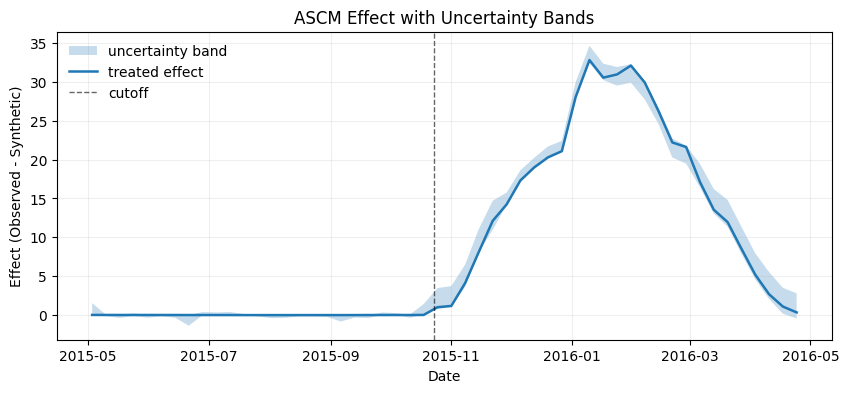

In [26]:
out1 = nm.uncertainty_bands(df,date_col="date",outcome_col='SO2wn',unit_col='ID',treated_unit="2+26 cities",donors=control_pool,
                            cutoff_date='2015-10-23', scm_backend='mlscm',backend='h2o',method = "bootstrap")
nm.plot_uncertainty_bands(out1, cutoff_date="2015-10-23")
plt.show()

In [6]:
scm_all=nm.scm_all(df,date_col="date",outcome_col='SO2wn',unit_col='ID',donors=control_pool,cutoff_date='2015-10-23')

In [7]:
scm_all

,date,observed,synthetic,effect,ID
0,2015-05-03,36.822724,36.537563,0.285161,2+26 cities
1,2015-05-10,35.284317,35.519014,-0.234697,2+26 cities
2,2015-05-17,34.742172,34.747215,-0.005043,2+26 cities
3,2015-05-24,34.482513,34.431788,0.050725,2+26 cities
4,2015-05-31,34.490734,34.585291,-0.094558,2+26 cities
...,...,...,...,...,...
1971,2016-03-27,9.927490,7.499944,2.427546,Zhuhai
1972,2016-04-03,9.500385,7.112385,2.388000,Zhuhai
1973,2016-04-10,8.597066,7.236877,1.360190,Zhuhai
1974,2016-04-17,8.593793,7.401549,1.192244,Zhuhai


# Batch Run

In [8]:
mlscm_all=nm.scm_all(df,date_col="date",outcome_col='SO2wn',unit_col='ID',donors=control_pool,cutoff_date='2015-10-23',scm_backend='mlscm')

In [9]:
mlscm_all

,date,observed,synthetic,effect,ID
0,2015-05-03,36.822724,36.690026,0.132698,2+26 cities
1,2015-05-10,35.284317,35.294750,-0.010433,2+26 cities
2,2015-05-17,34.742172,34.758799,-0.016628,2+26 cities
3,2015-05-24,34.482513,34.449995,0.032518,2+26 cities
4,2015-05-31,34.490734,34.482246,0.008487,2+26 cities
...,...,...,...,...,...
1971,2016-03-27,9.927490,8.586380,1.341110,Zhuhai
1972,2016-04-03,9.500385,8.627994,0.872391,Zhuhai
1973,2016-04-10,8.597066,8.619910,-0.022844,Zhuhai
1974,2016-04-17,8.593793,8.619910,-0.026118,Zhuhai


In [10]:
mlscm_all_h2o=nm.scm_all(df,date_col="date",outcome_col='SO2wn',unit_col='ID',donors=control_pool,cutoff_date='2015-10-23',scm_backend='mlscm',backend='h2o')

Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321.Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html
--------------------------  -------------------------------
H2O_cluster_uptime:         20 hours 27 mins
H2O_cluster_timezone:       Europe/London
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    5 months and 21 days
H2O_cluster_name:           H2O_from_python_n94921cs_um8ihg
H2O_cluster_total_

In [11]:
mlscm_all_h2o

,date,observed,synthetic,effect,ID
0,2015-05-03,36.822724,36.808739,0.013985,2+26 cities
1,2015-05-10,35.284317,35.274565,0.009752,2+26 cities
2,2015-05-17,34.742172,34.733901,0.008271,2+26 cities
3,2015-05-24,34.482513,34.474942,0.007572,2+26 cities
4,2015-05-31,34.490734,34.483141,0.007593,2+26 cities
...,...,...,...,...,...
1971,2016-03-27,9.927490,8.584314,1.343175,Zhuhai
1972,2016-04-03,9.500385,8.743106,0.757279,Zhuhai
1973,2016-04-10,8.597066,8.744381,-0.147315,Zhuhai
1974,2016-04-17,8.593793,8.744041,-0.150249,Zhuhai
